In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

C:\Users\llozada.GOURMET\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Análisis exploratorio

## Carga de datos

In [2]:
df = pd.read_csv(r'C:\Users\llozada.GOURMET\OneDrive - UP\Documents\GitHub\PFG\Creditos Bancarios.csv',index_col=[0])

## Exploración general

Mostramos una primera vista del dataframe con el que vamos a trabajar

In [3]:
categoricas = ["year", "loan_limit", "Gender", "approv_in_adv", "loan_purpose", "Credit_Worthiness", "open_credit", "business_or_commercial","Neg_ammortization","interest_only", "lump_sum_payment", "property_value", "construction_type", "occupancy_type", "Secured_by", "total_units","credit_type", "co-applicant_credit_type", "age", "submission_of_application", "Region", "Security_Type"]

In [4]:
df.columns

Index(['year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [5]:
df

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
ID,,,,,,,,,,,,,,,,,,,,,
24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0


In [6]:
df.shape

(148670, 33)

Vemos que el dataset tiene 33 variables y 148670 registros

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148670 entries, 24890 to 173559
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       148

La variable target que se va a utilizar es Status. Vemos que no tiene ningún nulo, lo cual es muy buena noticia.

In [8]:
# Sacar la proporción
df['Status'].mean()

0.24644514696979888

Vemos que un 24,64% de los registros tiene Status=1. Más adelante, se discutirá si merecerá la pena balancearla o no.

## Variables continuas

In [6]:
continuas = ['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','Credit_Score','property_value','income','LTV','dtir1']

-------------------------- Análisis de la variable:  loan_amount
Porcentaje de nulos;  0.0
Media de la variable:  331117.7439967714
Mediana de la variable:  296500.0
Percentil 25 de la variable:  196500.0
Percentil 75 de la variable:  436500.0


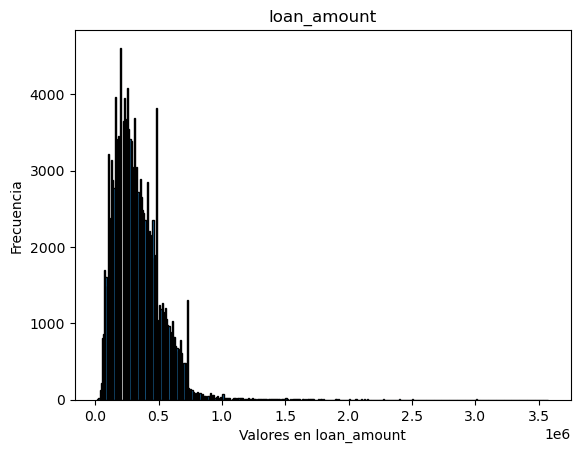

<Figure size 800x600 with 0 Axes>

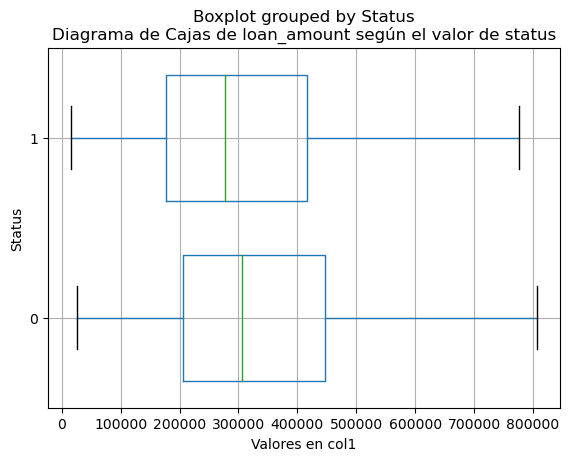

-------------------------- Análisis de la variable:  rate_of_interest
Porcentaje de nulos;  24.509988565278807
Media de la variable:  4.045475804367777
Mediana de la variable:  3.99
Percentil 25 de la variable:  3.625
Percentil 75 de la variable:  4.375


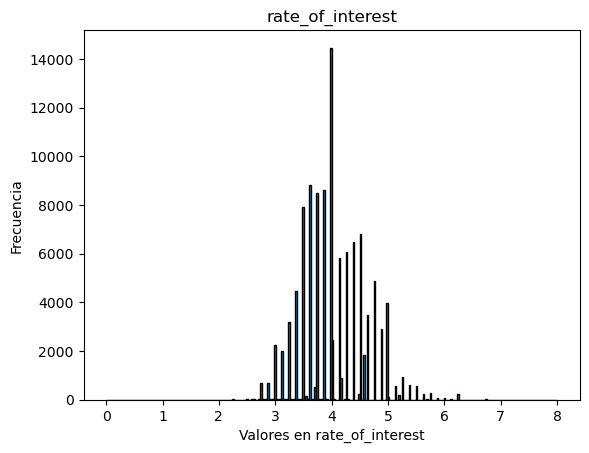

<Figure size 800x600 with 0 Axes>

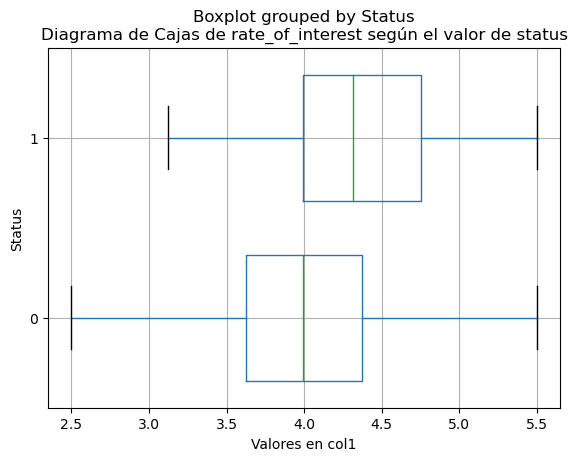

-------------------------- Análisis de la variable:  Interest_rate_spread
Porcentaje de nulos;  24.64451469697989
Media de la variable:  0.4416556604868295
Mediana de la variable:  0.3904
Percentil 25 de la variable:  0.076
Percentil 75 de la variable:  0.7754


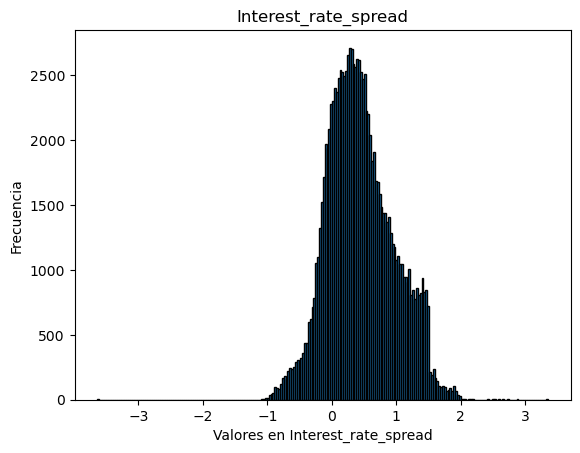

<Figure size 800x600 with 0 Axes>

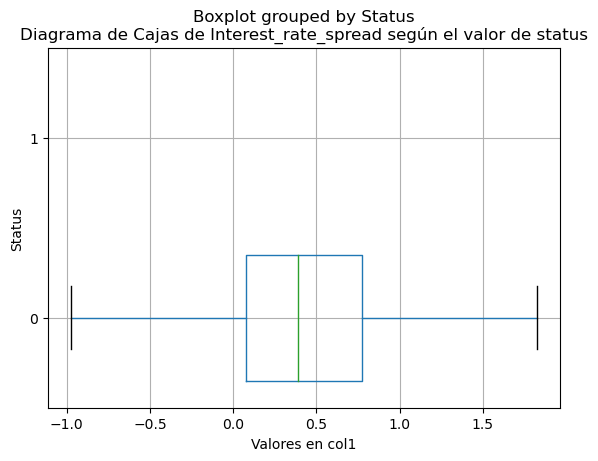

-------------------------- Análisis de la variable:  Upfront_charges
Porcentaje de nulos;  26.664424564471652
Media de la variable:  3224.996126591334
Mediana de la variable:  2596.45
Percentil 25 de la variable:  581.49
Percentil 75 de la variable:  4812.5


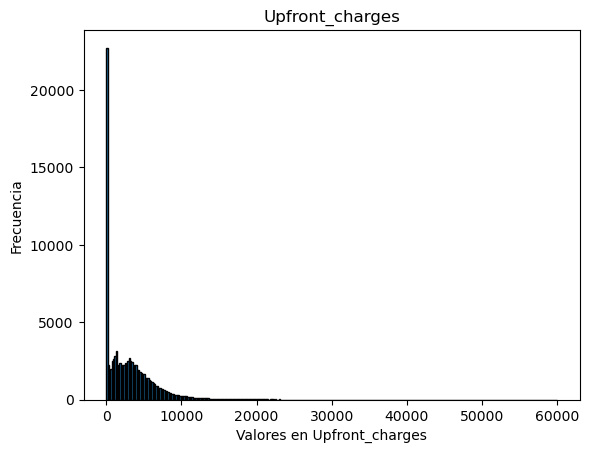

<Figure size 800x600 with 0 Axes>

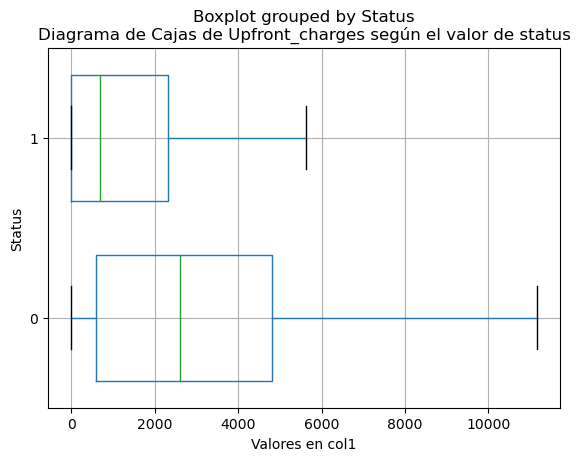

-------------------------- Análisis de la variable:  term
Porcentaje de nulos;  0.027577856998722002
Media de la variable:  335.1365816899797
Mediana de la variable:  360.0
Percentil 25 de la variable:  360.0
Percentil 75 de la variable:  360.0


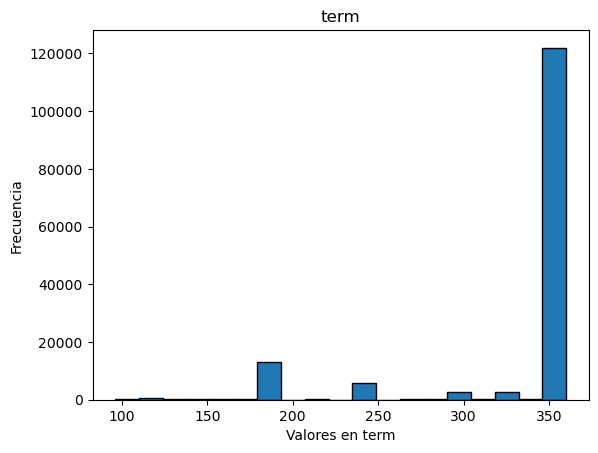

<Figure size 800x600 with 0 Axes>

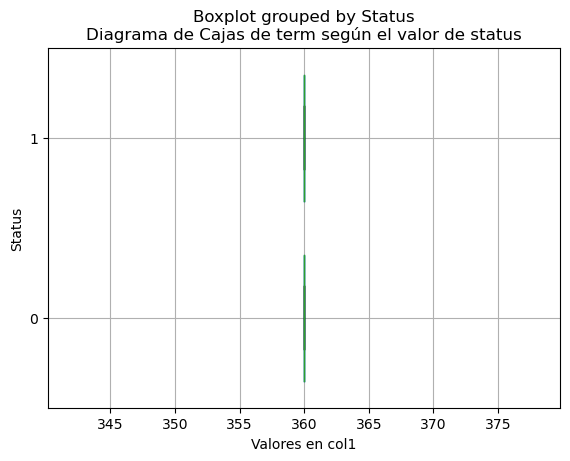

-------------------------- Análisis de la variable:  Credit_Score
Porcentaje de nulos;  0.0
Media de la variable:  699.7891033833322
Mediana de la variable:  699.0
Percentil 25 de la variable:  599.0
Percentil 75 de la variable:  800.0


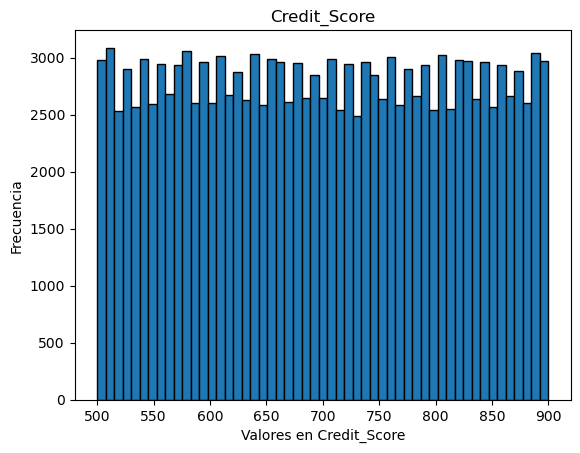

<Figure size 800x600 with 0 Axes>

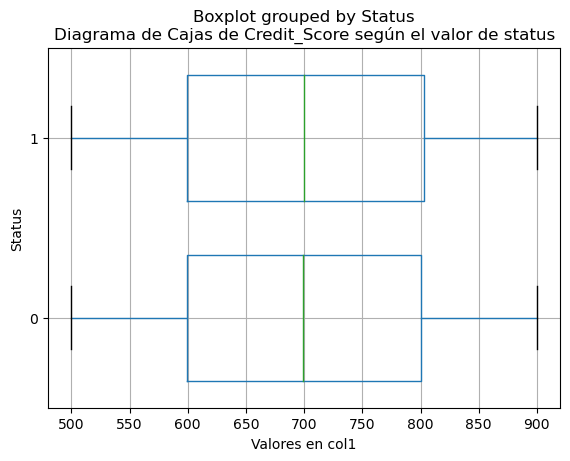

-------------------------- Análisis de la variable:  property_value
Porcentaje de nulos;  10.15537768211475
Media de la variable:  497893.46569640347
Mediana de la variable:  418000.0
Percentil 25 de la variable:  268000.0
Percentil 75 de la variable:  628000.0


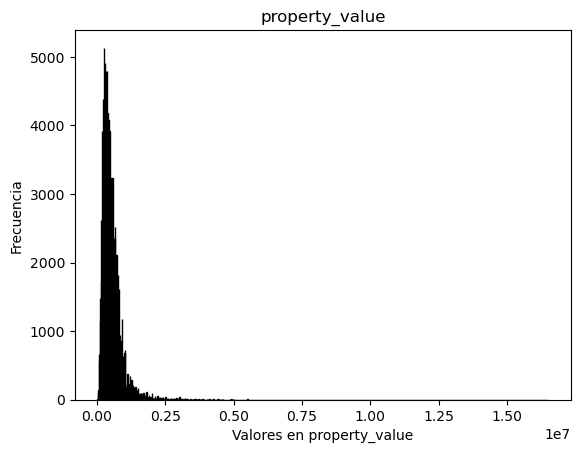

<Figure size 800x600 with 0 Axes>

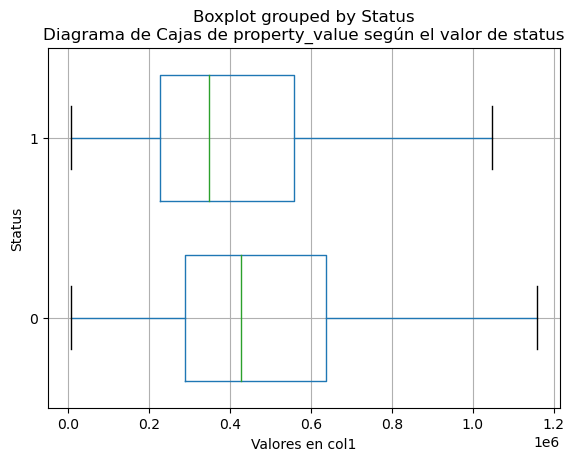

-------------------------- Análisis de la variable:  income
Porcentaje de nulos;  6.154570525324544
Media de la variable:  6957.338876146789
Mediana de la variable:  5760.0
Percentil 25 de la variable:  3720.0
Percentil 75 de la variable:  8520.0


KeyboardInterrupt: 

In [7]:
n = 148670
for col in continuas:
  print("-------------------------- Análisis de la variable: ", col)
  # Cantidad de nulos
  cantidad_nulos = df[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # Medias/medianas percentil
  print("Media de la variable: ", df[col].mean())
  print("Mediana de la variable: ", df[col].median())
  print("Percentil 25 de la variable: ", df[col].quantile(0.25))
  print("Percentil 75 de la variable: ", df[col].quantile(0.75))
  # Histogram
  plt.hist(df[col], bins='auto', edgecolor='black')
  plt.xlabel('Valores en ' + col)
  plt.ylabel('Frecuencia')
  plt.title(col)
  plt.show()

  # Diagrama de cajas por clase
  plt.figure(figsize=(8, 6))
  df.boxplot(column=col, by='Status', showfliers=False, vert=False, widths=0.7)

  # Agregar etiquetas y título
  plt.xlabel('Valores en col1')
  plt.ylabel('Status')
  plt.title('Diagrama de Cajas de ' + col + ' según el valor de status')

  # Mostrar el diagrama de cajas
  plt.show()



  # Histograma por clase

continuas = ['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']

Lo analizamos variable a variable:


*   **loan_amount**: Variable sin nulos. Distribución bastante normal. Se ve que la distribución de los prestamos en mora es mayor que la de los prestamos no en mora.
*   **rate_of_interest**: Muy poquitos nulos. Distribución bastante normal. Los intereses son menores para prestamos pagados.
*   **interest_rate_spread**: Distribucion bastante normal (un poco de cola a la derecha). Misma información que el rate_of_interest.
*   **Upfront_charges**: Muchos valor 0 (no pagan en adelantado), se podría crear una variable binaria (pagan por adelantado o no). Cuanto más se paga de adelantado, menos probable de que se vuelva en moroso. Estará correlacionada con loan_amount.
*   **term**: Poca varianza respecto al objetivo.
*   **Credit_score**: Variable nada normal, muy uniforme. No se ve diferencia entre clases.
*   **property_value**: Hay outliers (propiedades de muchísimo valor). Los prestamos morosos tienen propiedades de menor valor.  
*   **income**: Hay outliers. Los morosos tienen menores ingresos que los no morosos (como era esperado).
*   **LTV**: Habría que quitar outliers. No se ve mucha diferencia entre clases.
*   **dtir1**: 16% de nulos. Variable poco normal. Distribuciones muy parecidas para las dos clases.



## Variables categóricas

In [8]:
categoricas = ["year", "loan_limit", "Gender", "approv_in_adv", "loan_purpose", "Credit_Worthiness", "open_credit", "business_or_commercial","Neg_ammortization","interest_only", "lump_sum_payment", "construction_type", "occupancy_type", "Secured_by", "total_units","credit_type", "co-applicant_credit_type", "age", "submission_of_application", "Region", "Security_Type"]

Porcentaje de nulos;  0.0
Frecuencia de categorías:
year
2019    148670
Name: count, dtype: int64


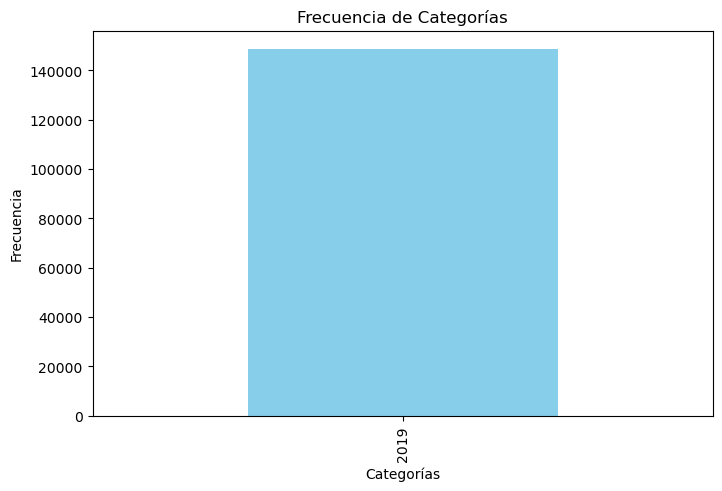


Proporciones de la variable objetivo por categoría:
year
2019    0.246445
Name: Status, dtype: float64


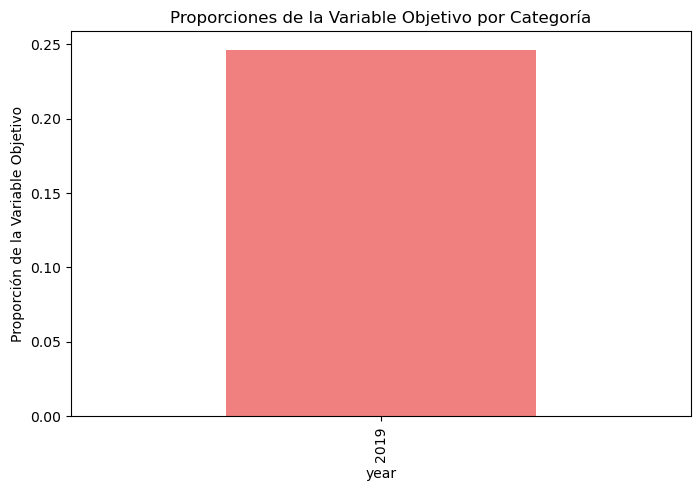

Porcentaje de nulos;  2.2492769220421067
Frecuencia de categorías:
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64


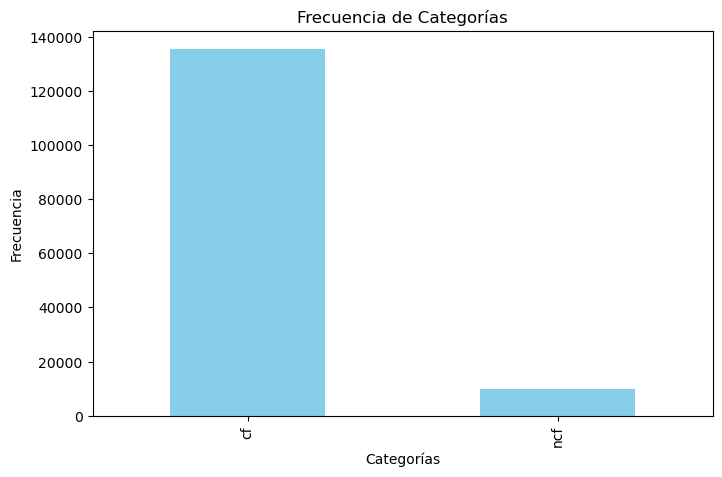


Proporciones de la variable objetivo por categoría:
loan_limit
cf     0.239708
ncf    0.332131
Name: Status, dtype: float64


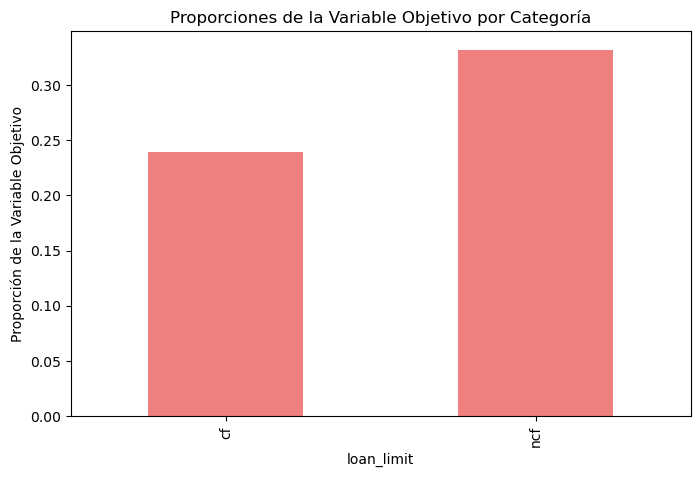

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


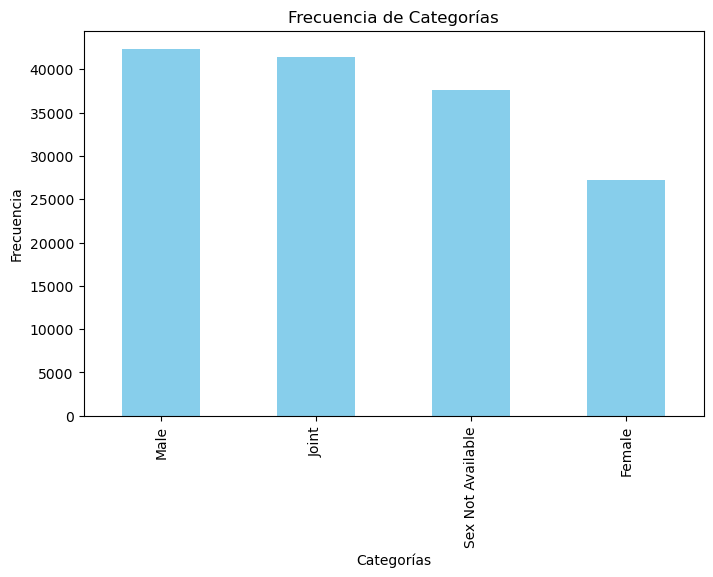


Proporciones de la variable objetivo por categoría:
Gender
Female               0.251155
Joint                0.191623
Male                 0.261914
Sex Not Available    0.285908
Name: Status, dtype: float64


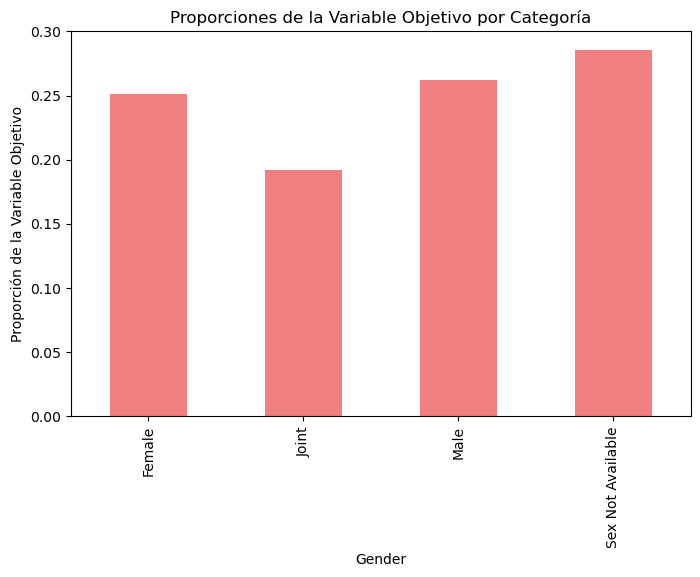

Porcentaje de nulos;  0.6107486379229166
Frecuencia de categorías:
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64


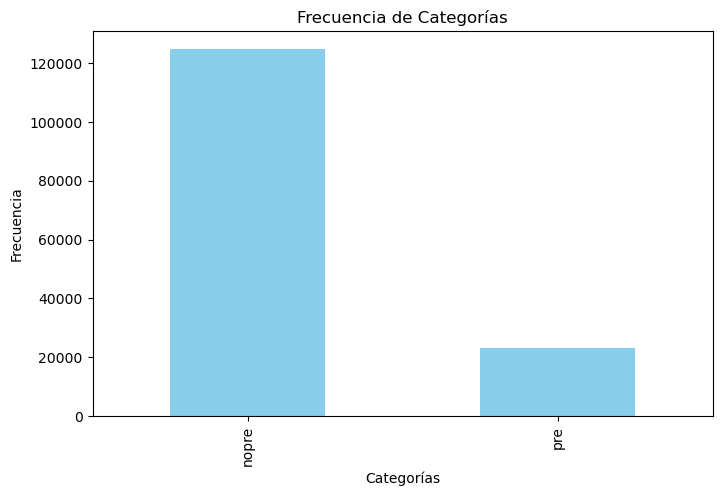


Proporciones de la variable objetivo por categoría:
approv_in_adv
nopre    0.253272
pre      0.208937
Name: Status, dtype: float64


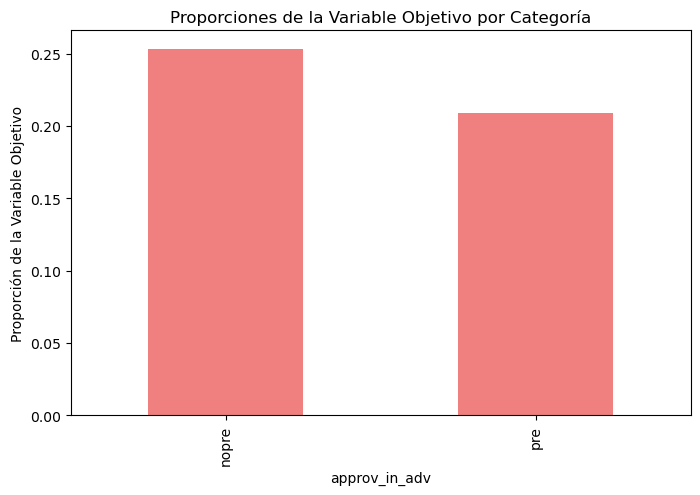

Porcentaje de nulos;  0.09013250823972557
Frecuencia de categorías:
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


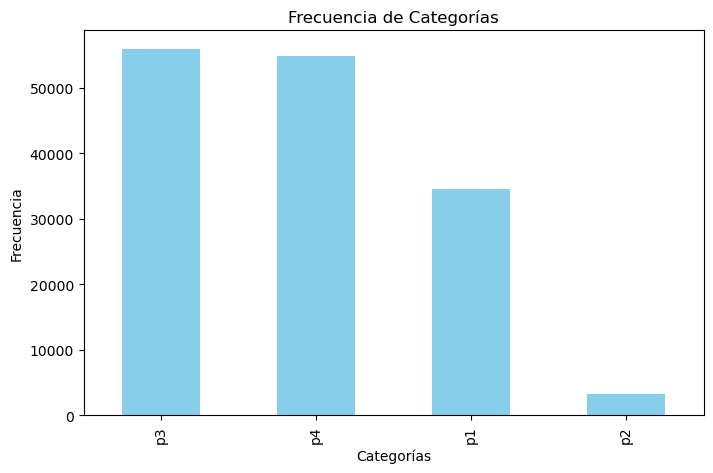


Proporciones de la variable objetivo por categoría:
loan_purpose
p1    0.258768
p2    0.330788
p3    0.250223
p4    0.229749
Name: Status, dtype: float64


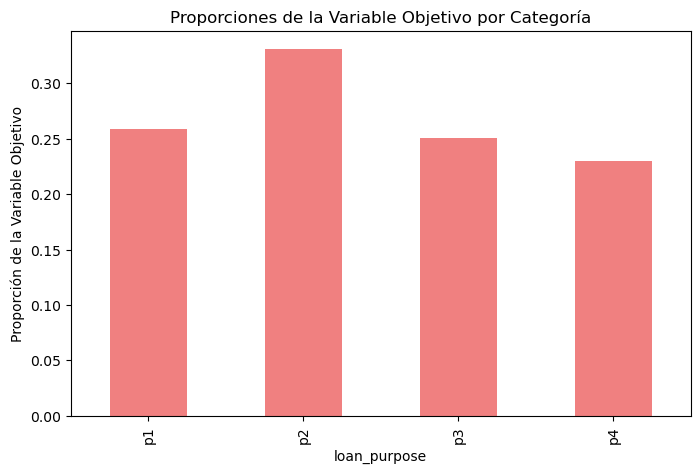

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64


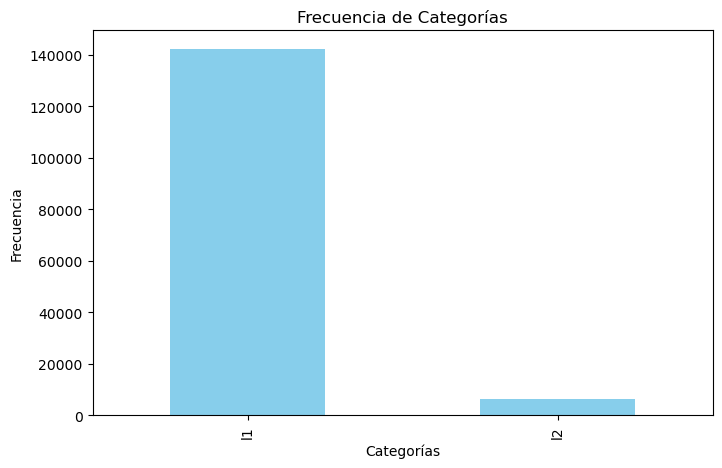


Proporciones de la variable objetivo por categoría:
Credit_Worthiness
l1    0.243277
l2    0.317736
Name: Status, dtype: float64


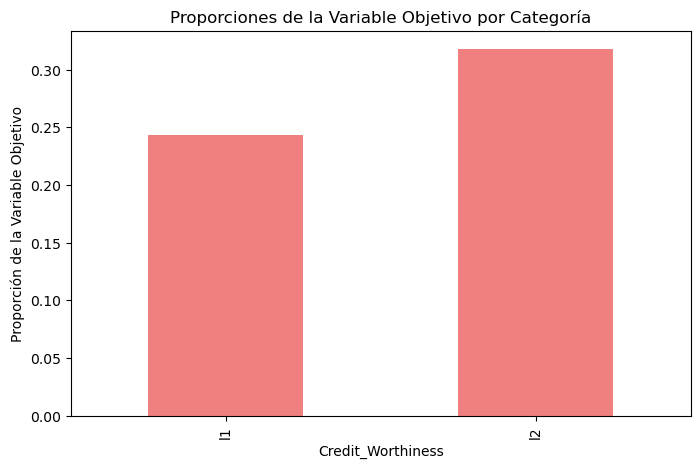

Porcentaje de nulos;  0.0
Frecuencia de categorías:
open_credit
nopc    148114
opc        556
Name: count, dtype: int64


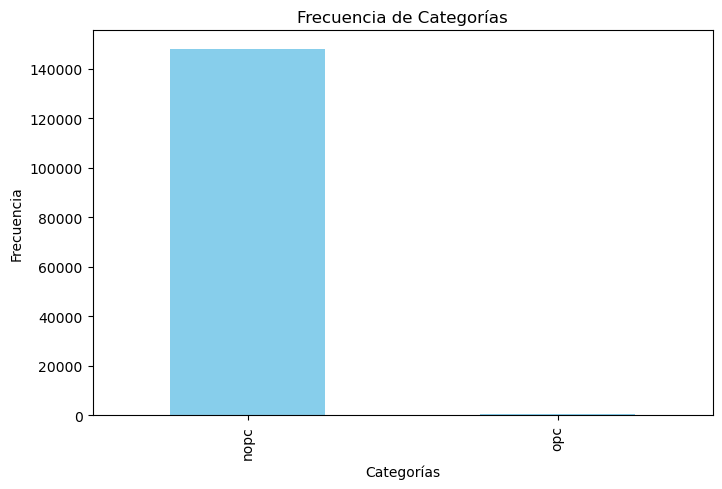


Proporciones de la variable objetivo por categoría:
open_credit
nopc    0.246709
opc     0.176259
Name: Status, dtype: float64


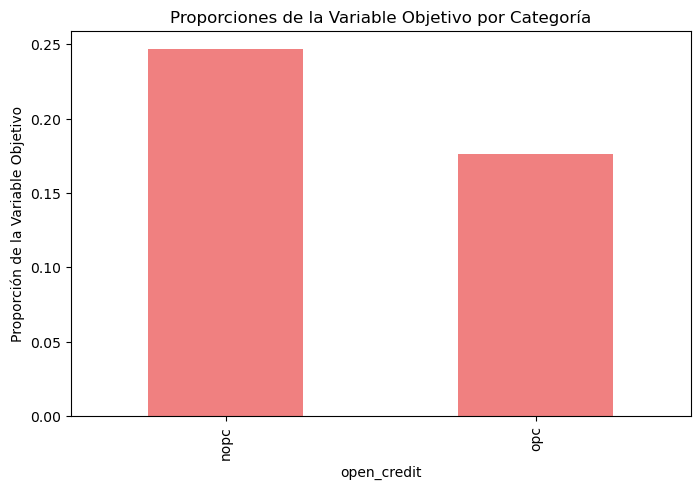

Porcentaje de nulos;  0.0
Frecuencia de categorías:
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


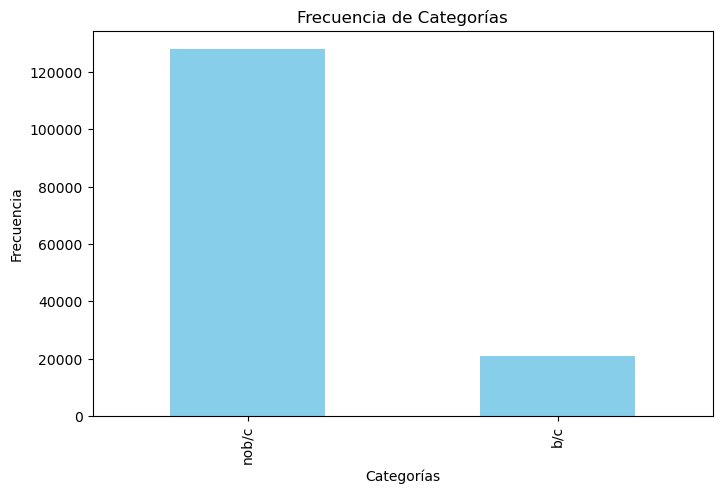


Proporciones de la variable objetivo por categoría:
business_or_commercial
b/c      0.345439
nob/c    0.230377
Name: Status, dtype: float64


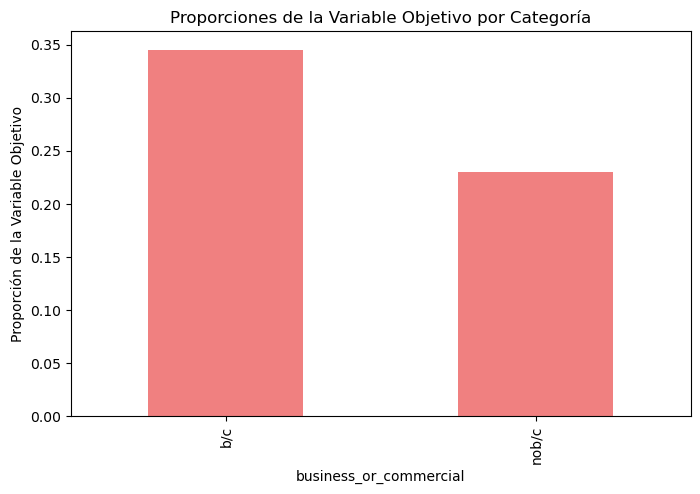

Porcentaje de nulos;  0.08138830967915517
Frecuencia de categorías:
Neg_ammortization
not_neg    133420
neg_amm     15129
Name: count, dtype: int64


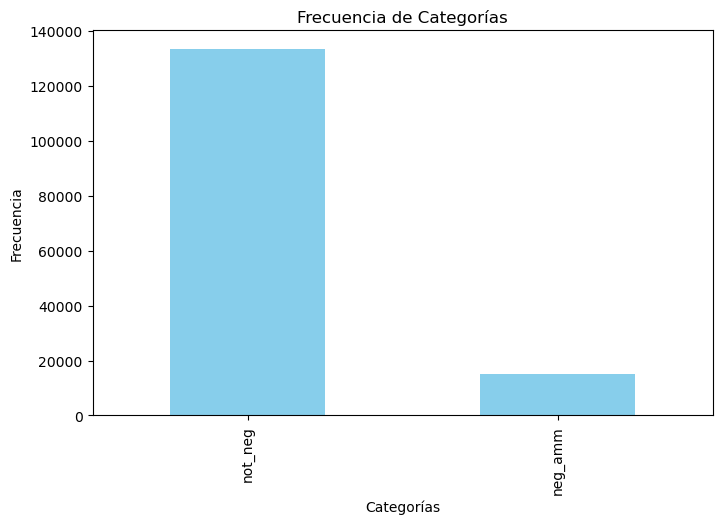


Proporciones de la variable objetivo por categoría:
Neg_ammortization
neg_amm    0.445965
not_neg    0.223805
Name: Status, dtype: float64


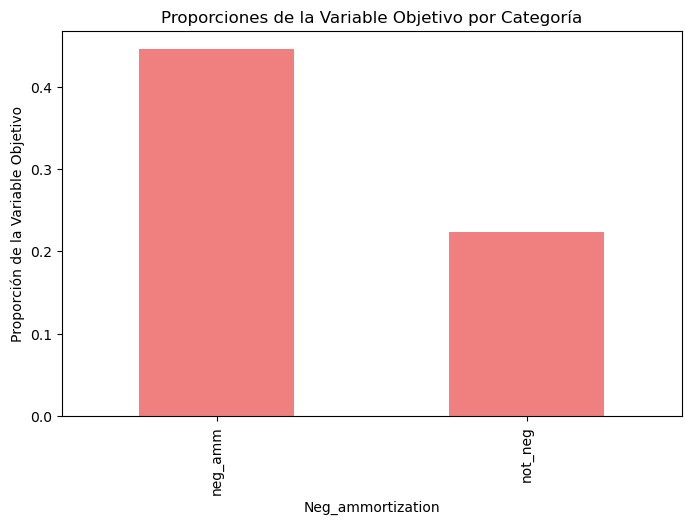

Porcentaje de nulos;  0.0
Frecuencia de categorías:
interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64


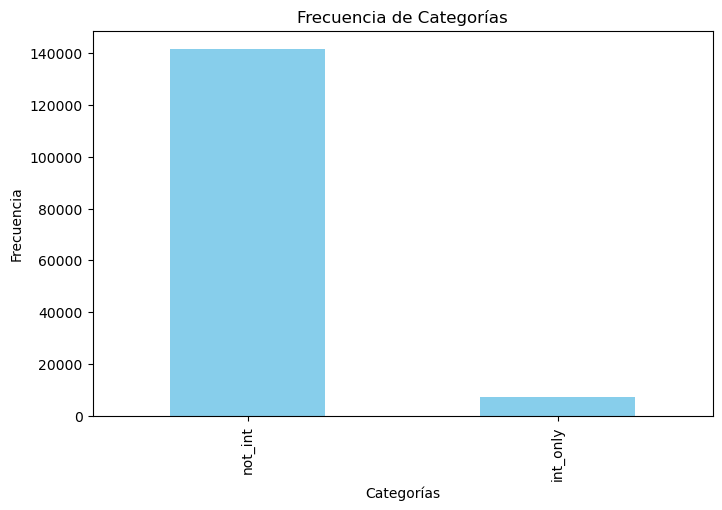


Proporciones de la variable objetivo por categoría:
interest_only
int_only    0.273136
not_int     0.245105
Name: Status, dtype: float64


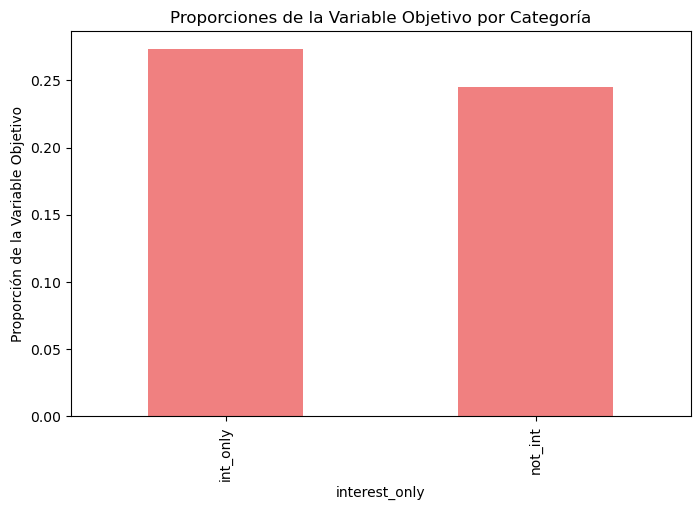

Porcentaje de nulos;  0.0
Frecuencia de categorías:
lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64


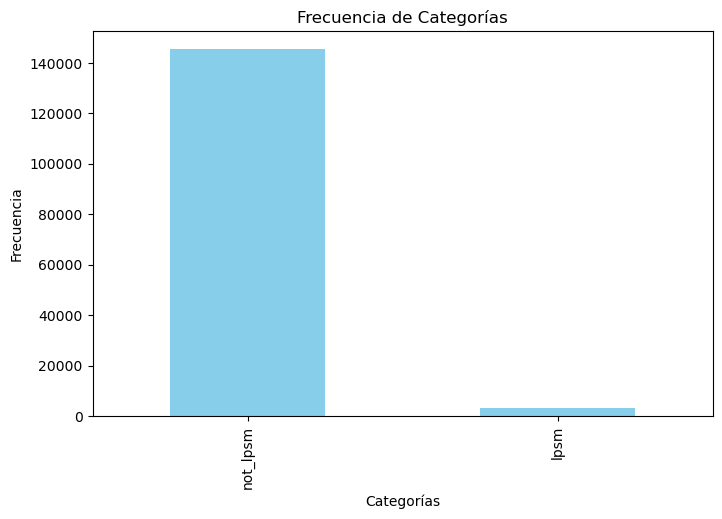


Proporciones de la variable objetivo por categoría:
lump_sum_payment
lpsm        0.776596
not_lpsm    0.234097
Name: Status, dtype: float64


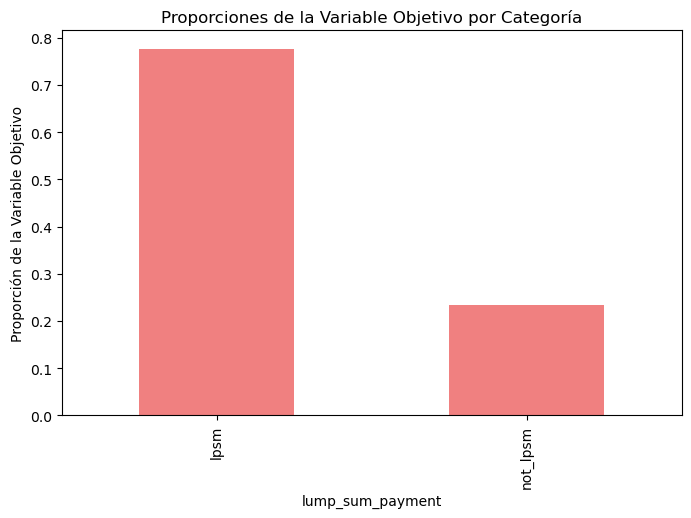

Porcentaje de nulos;  0.0
Frecuencia de categorías:
construction_type
sb    148637
mh        33
Name: count, dtype: int64


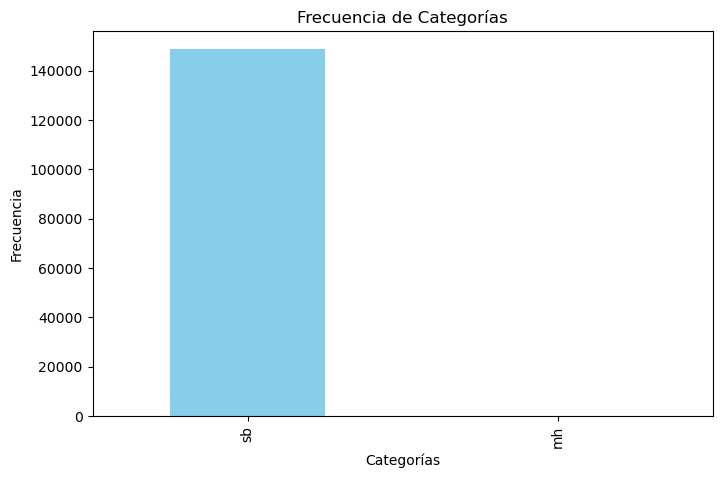


Proporciones de la variable objetivo por categoría:
construction_type
mh    1.000000
sb    0.246278
Name: Status, dtype: float64


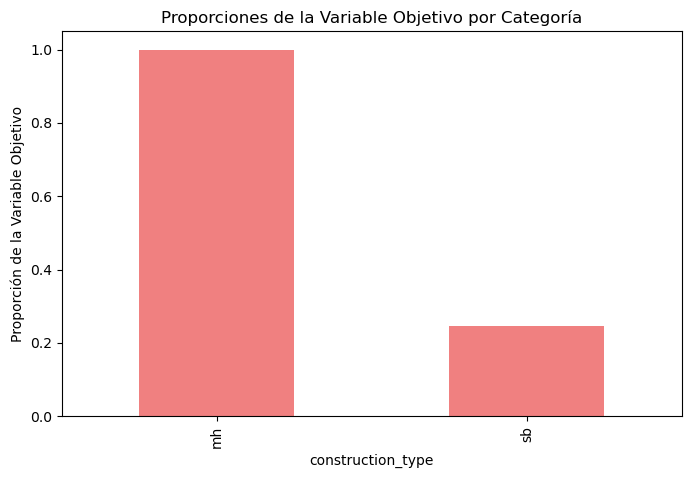

Porcentaje de nulos;  0.0
Frecuencia de categorías:
occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64


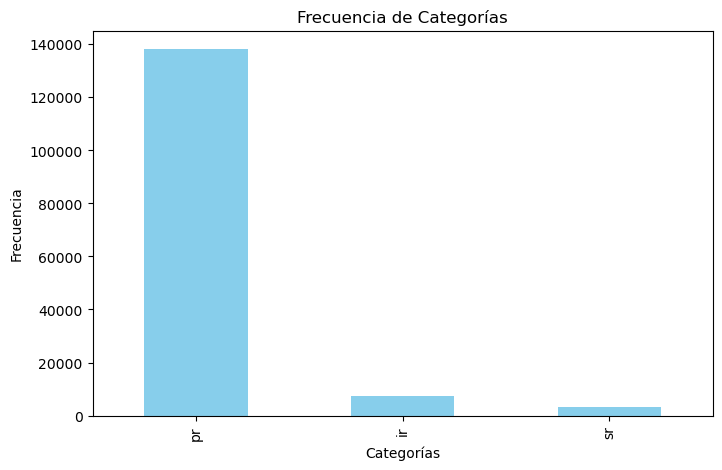


Proporciones de la variable objetivo por categoría:
occupancy_type
ir    0.299864
pr    0.243045
sr    0.271333
Name: Status, dtype: float64


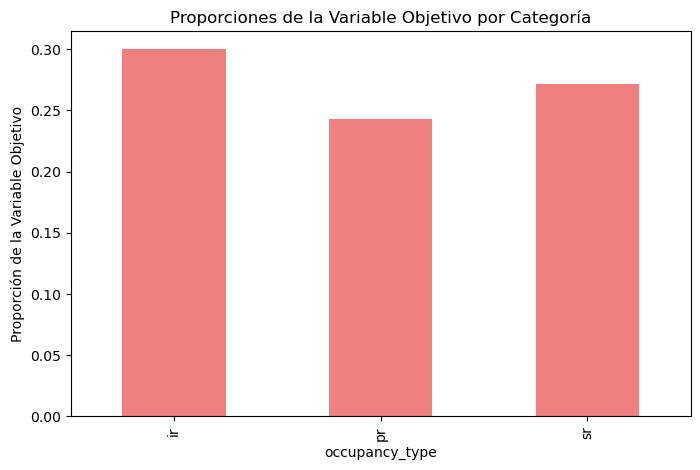

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Secured_by
home    148637
land        33
Name: count, dtype: int64


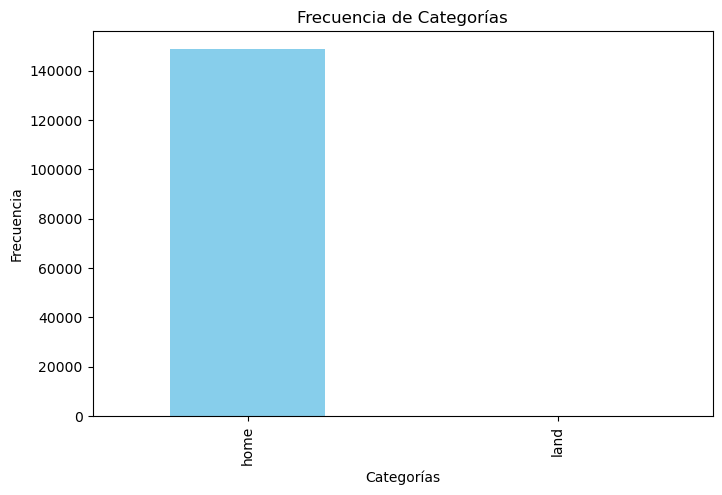


Proporciones de la variable objetivo por categoría:
Secured_by
home    0.246278
land    1.000000
Name: Status, dtype: float64


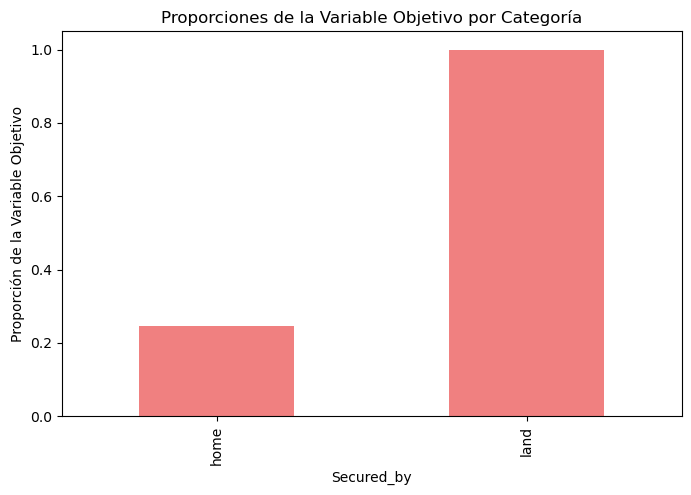

Porcentaje de nulos;  0.0
Frecuencia de categorías:
total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64


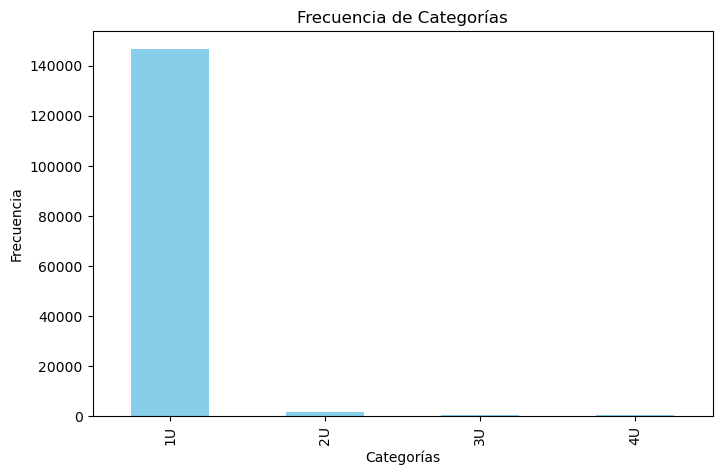


Proporciones de la variable objetivo por categoría:
total_units
1U    0.244969
2U    0.345295
3U    0.384224
4U    0.296875
Name: Status, dtype: float64


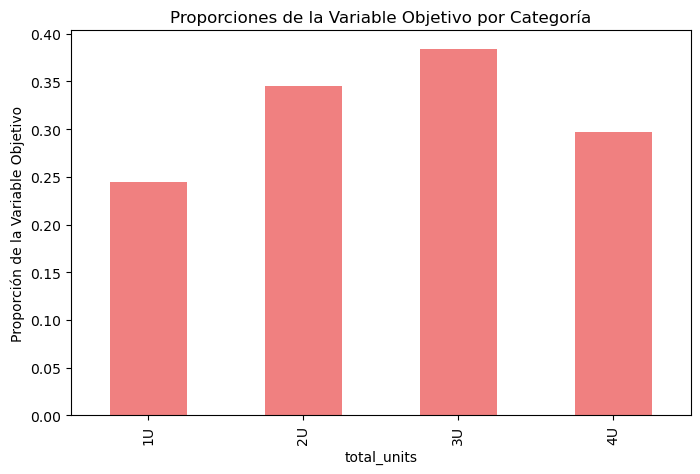

Porcentaje de nulos;  0.0
Frecuencia de categorías:
credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64


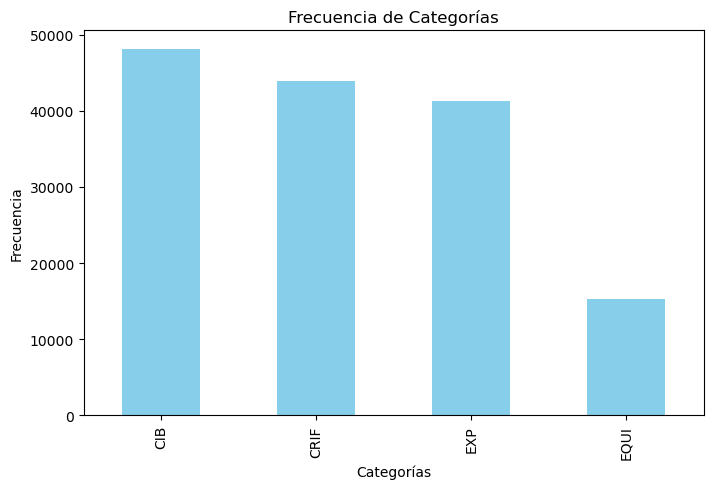


Proporciones de la variable objetivo por categoría:
credit_type
CIB     0.158041
CRIF    0.162343
EQUI    0.999935
EXP     0.159854
Name: Status, dtype: float64


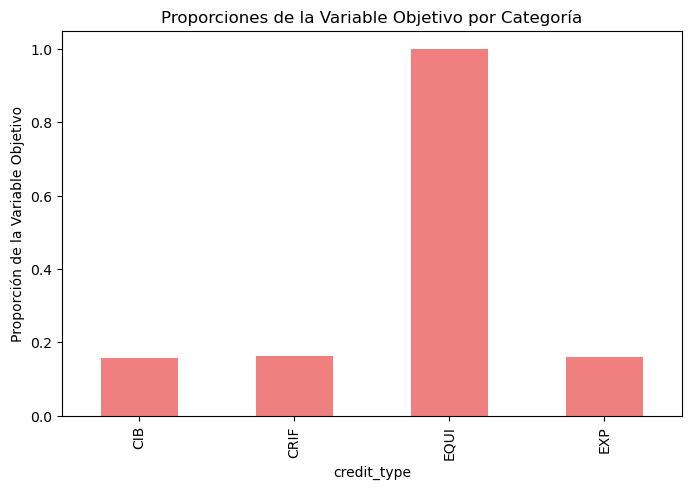

Porcentaje de nulos;  0.0
Frecuencia de categorías:
co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64


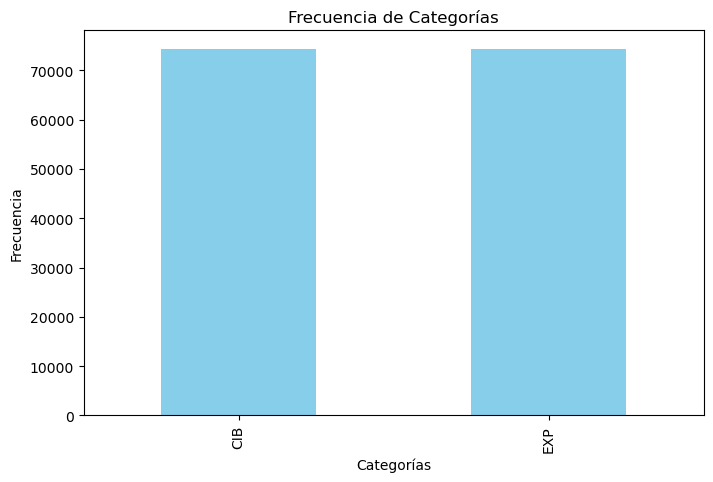


Proporciones de la variable objetivo por categoría:
co-applicant_credit_type
CIB    0.184334
EXP    0.308651
Name: Status, dtype: float64


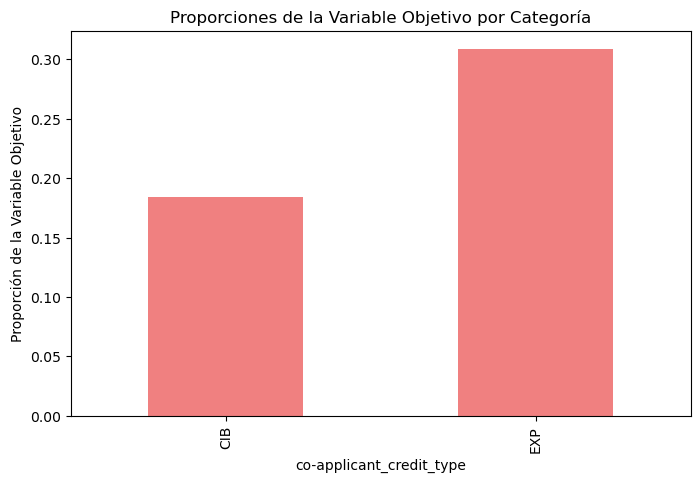

Porcentaje de nulos;  0.13452613170108293
Frecuencia de categorías:
age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64


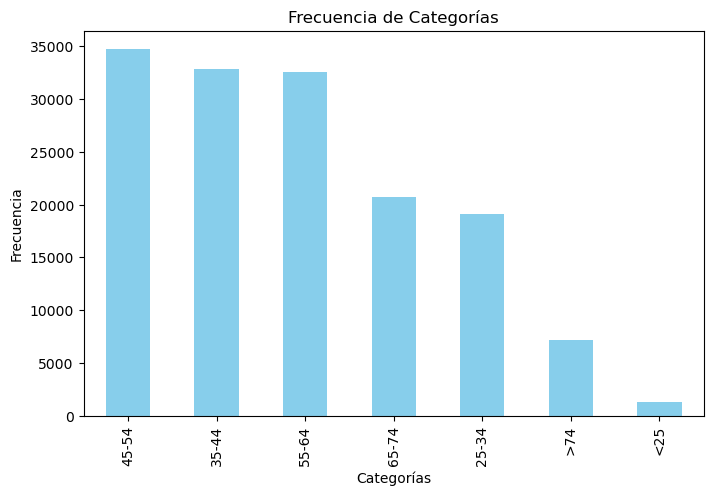


Proporciones de la variable objetivo por categoría:
age
25-34    0.221920
35-44    0.222713
45-54    0.240467
55-64    0.258868
65-74    0.268560
<25      0.289454
>74      0.300070
Name: Status, dtype: float64


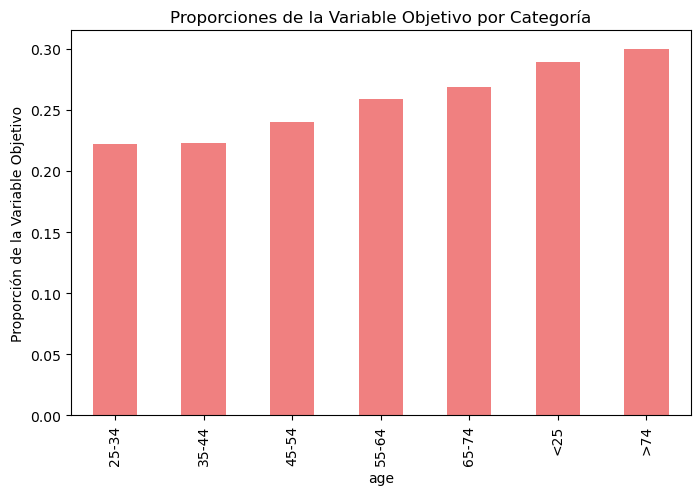

Porcentaje de nulos;  0.13452613170108293
Frecuencia de categorías:
submission_of_application
to_inst     95814
not_inst    52656
Name: count, dtype: int64


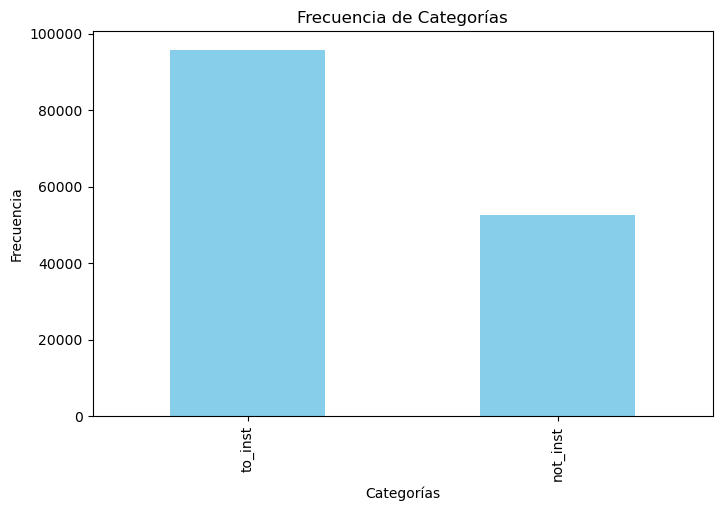


Proporciones de la variable objetivo por categoría:
submission_of_application
not_inst    0.175213
to_inst     0.284019
Name: Status, dtype: float64


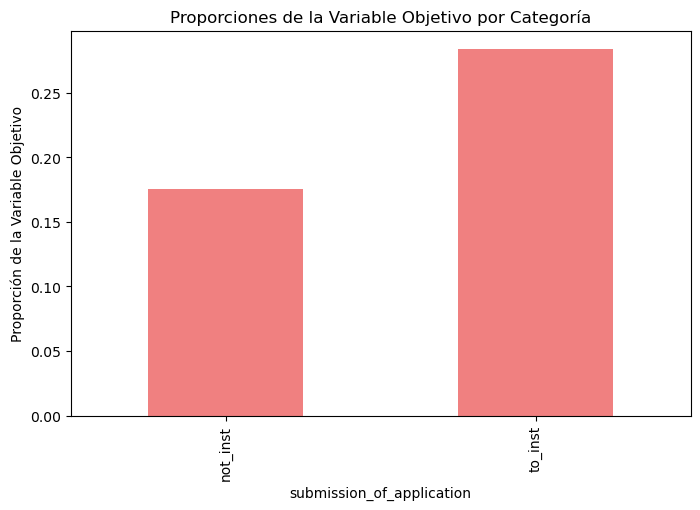

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64


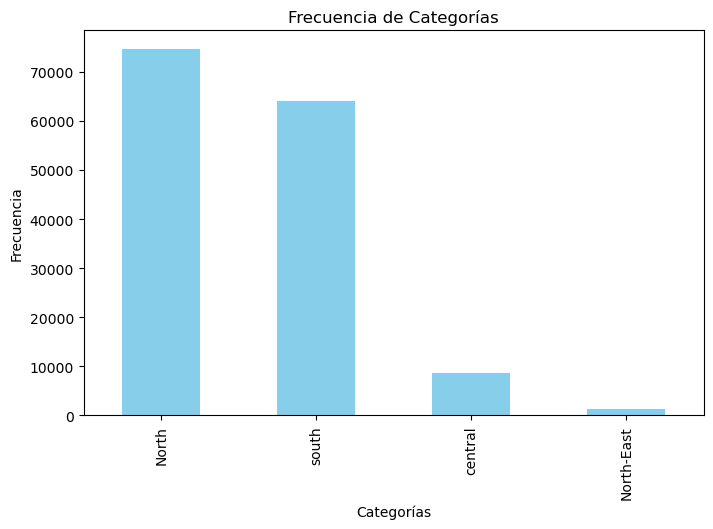


Proporciones de la variable objetivo por categoría:
Region
North         0.225114
North-East    0.304453
central       0.275382
south         0.266293
Name: Status, dtype: float64


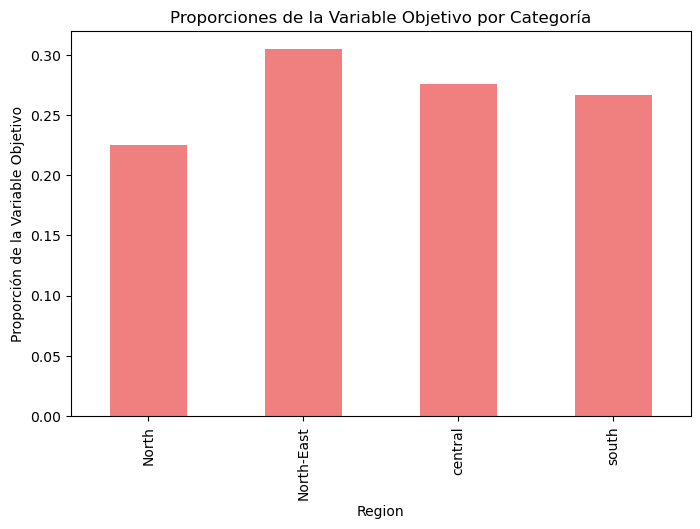

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64


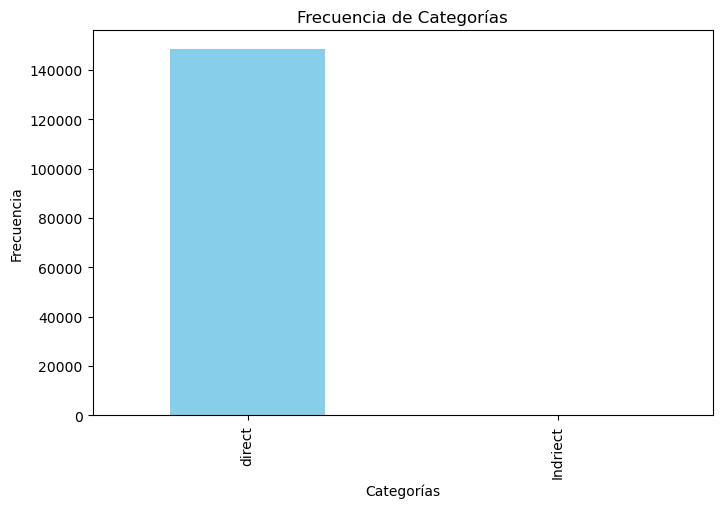


Proporciones de la variable objetivo por categoría:
Security_Type
Indriect    1.000000
direct      0.246278
Name: Status, dtype: float64


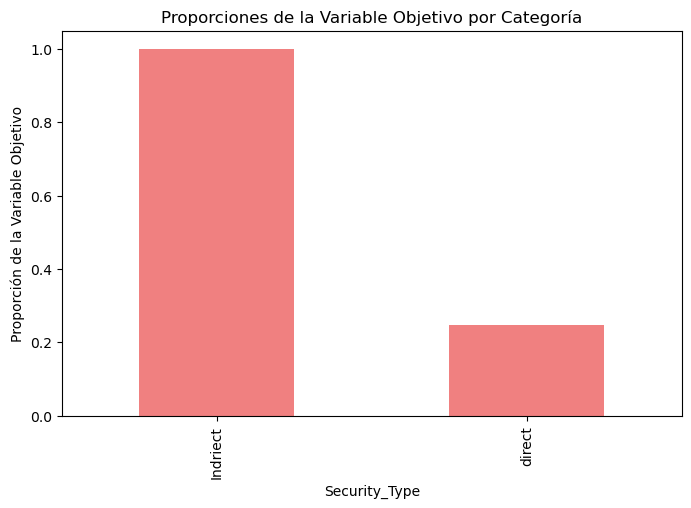

In [12]:
n = 148670
for col in categoricas:
  # Cantidad de nulos
  cantidad_nulos = df[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # 1. Exploración de Frecuencias
  frecuencia_categoria = df[col].value_counts()
  print("Frecuencia de categorías:")
  print(frecuencia_categoria)

  # Gráfico de barras para visualizar las frecuencias
  plt.figure(figsize=(8, 5))
  frecuencia_categoria.plot(kind='bar', color='skyblue')
  plt.title('Frecuencia de Categorías')
  plt.xlabel('Categorías')
  plt.ylabel('Frecuencia')
  plt.show()

  # 2. Análisis de Proporciones
  proporciones_categoria = df.groupby(col)['Status'].mean()
  print("\nProporciones de la variable objetivo por categoría:")
  print(proporciones_categoria)

  # Gráfico de barras para visualizar las proporciones
  plt.figure(figsize=(8, 5))
  proporciones_categoria.plot(kind='bar', color='lightcoral')
  plt.title('Proporciones de la Variable Objetivo por Categoría')
  plt.xlabel(col)
  plt.ylabel('Proporción de la Variable Objetivo')
  plt.show()


Análisis de las variables categóricas:

*   **year**: Todos los datos son de 2019. Se borra.
*   **loan_limit**: Muy pocos nulos. 2 categorias y desbalanceada. La clase minoritaria presenta un porcentaje mayor de mora (33% vs 24%)
*   **Gender**: Variable sin nulos ("Sex Not Available" la consideraría nula). Menor morosidad cuando el prestamo es conjunto.
*   **approv_in_adv**: Muy pocos nulos . 2 categorias y muy desbalanceada (pocos prestamos tenian un límite preconcebido. Los concebidos tienen una tasa de morosidad menor (20.8% vs 25.3%)
*   **loan_purpose**: Muy pocos nulos. 4 categorias. p2 (la variable más minoritaria) es la que presenta una tasa de morosidad mayor.
*   **Credit_Worthiness**: Variable sin nulos. 2 categorias muy desbalanceadas donde la clase minoritaria tiene una tasa de morosidad mayor (31% vs 24%)
*   **open_credit**: Variable muy muy desbalanceada, donde la clase mayoritaria tiene un porcentaje de morosidad mayor.
*   **business_or_comercial**: Variable desbalanceada, donde la clase mayoritaria tiene un porcentaje de morosidad mayor.
*   **Neg_ammortization**: Variable con poco nulo. Variable de 2 categorias desbalanceada donde la clase mayoritaria tiene el doble de tasa de morosidad que la minoritaria.
*   **interest_only**: Variable sin nulos. Categoria desbalanceada que aporta poca información. La borraría.
*   **lump_sum_payment**: Variable sin nulos .Categoria desbalanceada que nos separa un grupo pequeño con una tasa de morosidad enorme (77%).
*   **construction_type**: Nos separa un grupo de 33 prestamos, todos en morosidad.
*   **occupancy_type**: Variable con poca varianza, aporta poca información.
*   **Secured_by**: Nos separa un grupo de 33 prestamos con un 100% de morosidad. Puede que sea el mismo grupo que separa "construction_type".
*   **total_units**: 4 categorias desbalanceadas (una categoria grande y las demás pequeñas). Da poca información sobre la variable objetivo.
*   **credit_type**: Nos separa un grupo de 15298 empresas con un 99,999% de morosidad. De las otras tres categorias, tienen una proporcian similar.
*   **co-applicant_credit_type**: Dos categorias balanceadas, donde EXP tiene una tasa de morosidad bastante mayor (30,8% vs 18,4%)
*   **age**: Se ve que las personas mayores de 65 y los menores de 25 son los más propensos a caer en mora.
*   **submission_of_application**: 13% de nulos. Separa dos categorias; la grande con mayor tasa de morosidad que la otra (28% vs 17,5%)
*   **Region**: 4 categorias desbalanceadas que aportan poca información.
*   **Security_type**: Nos separa 33 prestamos morosos. Puede que sean los mismos de antes.

Después de analizar las variables por separado, las variables que más varianza respecto al objetivo muestran y que se espera que sean las más decisivas en el modelo son:
*   loan_amount
*   income
*   property_value
*   credit_type
*   co-applicant_credit_type
*   submission_of_application


In [9]:
df.info()

# Número de registros nulos por columna
df.isna().sum()

# La dimensión del dataframe
df.shape

#Imponemos un umbral del 5%
umbral=len(df)*0.05

<class 'pandas.core.frame.DataFrame'>
Index: 148670 entries, 24890 to 173559
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       148

In [10]:
# Iterar sobre cada columna y eliminar los registros nulos si el número de valores nulos es menor que el umbral
for columna in df.columns:
    # Contar los valores nulos en la columna actual
    nulos_en_columna = df[columna].isnull().sum()

    # Verificar si el número de valores nulos está por debajo del umbral
    if nulos_en_columna < umbral:
        # Eliminar los registros nulos en la columna actual
        df = df.dropna(subset=[columna])


In [11]:
#Volver a mostrar el número de registros nulos en cada columna
df.isna().sum()


year                             0
loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             35255
Interest_rate_spread         35255
Upfront_charges              38307
term                             0
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               14597
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        8834
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
LTV                 

In [14]:
#Mostramos la dimensión del nuevo dataframe
df.shape

(143942, 33)

In [15]:
# Seleccionar solo las variables categóricas
variables_categoricas = df.select_dtypes(include=['object'])

# Inicializar un diccionario para almacenar la suma de registros de cada valor único
suma_registros_por_columna = {}

# Iterar sobre cada columna categórica
for columna in variables_categoricas.columns:
    # Obtener la serie de valores y contar su frecuencia
    valores_y_frecuencias = df[columna].value_counts()

    # Agregar la serie de valores y frecuencias al diccionario
    suma_registros_por_columna[columna] = valores_y_frecuencias

In [16]:
# Mostrar el resultado
for columna, valores_frecuencias in suma_registros_por_columna.items():
    print(f"Columna: {columna}")
    print(valores_frecuencias)
    print()

Columna: loan_limit
loan_limit
cf     134183
ncf      9759
Name: count, dtype: int64

Columna: Gender
Gender
Male                 40982
Joint                40192
Sex Not Available    36369
Female               26399
Name: count, dtype: int64

Columna: approv_in_adv
approv_in_adv
nopre    121000
pre       22942
Name: count, dtype: int64

Columna: loan_type
loan_type
type1    109653
type2     19915
type3     14374
Name: count, dtype: int64

Columna: loan_purpose
loan_purpose
p3    54075
p4    53539
p1    33183
p2     3145
Name: count, dtype: int64

Columna: Credit_Worthiness
Credit_Worthiness
l1    137631
l2      6311
Name: count, dtype: int64

Columna: open_credit
open_credit
nopc    143403
opc        539
Name: count, dtype: int64

Columna: business_or_commercial
business_or_commercial
nob/c    124027
b/c       19915
Name: count, dtype: int64

Columna: Neg_ammortization
Neg_ammortization
not_neg    129597
neg_amm     14345
Name: count, dtype: int64

Columna: interest_only
interest_only

In [17]:

'''for column in df[num]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df[num], x=column)'''

'for column in df[num]:\n        plt.figure(figsize=(17,1))\n        sns.boxplot(data=df[num], x=column)'

In [18]:
df

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
ID,,,,,,,,,,,,,,,,,,,,,
24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0


## Eliminando variables dado Matriz de Correlacion

In [19]:
del df['year']
del df['loan_limit']
del df['Credit_Worthiness']
del df['open_credit']
del df['Neg_ammortization']
del df['interest_only']
del df['lump_sum_payment']
del df['construction_type']
del df['Secured_by']
del df['total_units']
del df['Security_Type']

In [20]:
df

,Gender,approv_in_adv,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1
ID,,,,,,,,,,,,,,,,,,,,,
24890,Sex Not Available,nopre,type1,p1,nob/c,116500,NaN,NaN,NaN,360.0,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0
24891,Male,nopre,type2,p1,b/c,206500,NaN,NaN,NaN,360.0,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,1,NaN
24892,Male,pre,type1,p1,nob/c,406500,4.560,0.2000,595.00,360.0,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.0
24893,Male,nopre,type1,p4,nob/c,456500,4.250,0.6810,NaN,360.0,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,0,42.0
24894,Joint,pre,type1,p1,nob/c,696500,4.000,0.3042,0.00,360.0,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173555,Sex Not Available,nopre,type1,p3,nob/c,436500,3.125,0.2571,9960.00,180.0,...,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,0,48.0
173556,Male,nopre,type1,p1,nob/c,586500,5.190,0.8544,0.00,360.0,...,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,0,15.0
173557,Male,nopre,type1,p4,nob/c,446500,3.125,0.0816,1226.64,180.0,...,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,0,49.0


In [21]:
cat=[] #variables categóricas
num=[] #variables numéricas
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)

print('cat = ',cat)
print('num = ',num)

cat =  ['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'business_or_commercial', 'occupancy_type', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region']
num =  ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_encoded = pd.DataFrame()

for var in cat:
    onehot_encoded = encoder.fit_transform(df[[var]])
    onehot_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out([var]))
    df_encoded = pd.concat([df_encoded, onehot_df], axis=1)
df = df.drop(cat, axis=1)
df = pd.concat([df, df_encoded], axis=1)


In [23]:
df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south
24890,116500.0,NaN,NaN,NaN,360.0,118000.0,1740.0,758.0,98.728814,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24891,206500.0,NaN,NaN,NaN,360.0,NaN,4980.0,552.0,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24892,406500.0,4.56,0.2000,595.0,360.0,508000.0,9480.0,834.0,80.019685,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24893,456500.0,4.25,0.6810,NaN,360.0,658000.0,11880.0,587.0,69.376900,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
24894,696500.0,4.00,0.3042,0.0,360.0,758000.0,10440.0,602.0,91.886544,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
143804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
143809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
143891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
# Sustituir los valores nulos en cada columna según el método indicado
df['LTV'].fillna(df['LTV'].median(), inplace=True)
df['rate_of_interest'].fillna(df['rate_of_interest'].mean(), inplace=True)
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].median(), inplace=True)
df['Upfront_charges'].fillna(df['Upfront_charges'].median(), inplace=True)
df['property_value'].fillna(df['property_value'].median(), inplace=True)
df['LTV'].fillna(df['LTV'].median(), inplace=True)
df['income'].fillna(df['income'].mode()[0], inplace=True)
df['dtir1'].fillna(df['dtir1'].mean(), inplace=True)
df.isna().sum()


C:\Users\llozada.GOURMET\AppData\Local\Temp\ipykernel_1488\1802043009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LTV'].fillna(df['LTV'].median(), inplace=True)
C:\Users\llozada.GOURMET\AppData\Local\Temp\ipykernel_1488\1802043009.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

loan_amount                           28669
rate_of_interest                          0
Interest_rate_spread                      0
Upfront_charges                           0
term                                  28669
property_value                            0
income                                    0
Credit_Score                          28669
LTV                                       0
Status                                28669
dtir1                                     0
Gender_Female                         28669
Gender_Joint                          28669
Gender_Male                           28669
Gender_Sex Not Available              28669
approv_in_adv_nopre                   28669
approv_in_adv_pre                     28669
loan_type_type1                       28669
loan_type_type2                       28669
loan_type_type3                       28669
loan_purpose_p1                       28669
loan_purpose_p2                       28669
loan_purpose_p3                 

In [25]:
# Calcular la mediana de cada columna
median_values = df.median()

# Rellenar los valores nulos con la mediana correspondiente
df = df.fillna(median_values)

# Mostrar el DataFrame resultante después de rellenar los valores nulos con la mediana
df.isna().sum()


loan_amount                           0
rate_of_interest                      0
Interest_rate_spread                  0
Upfront_charges                       0
term                                  0
property_value                        0
income                                0
Credit_Score                          0
LTV                                   0
Status                                0
dtir1                                 0
Gender_Female                         0
Gender_Joint                          0
Gender_Male                           0
Gender_Sex Not Available              0
approv_in_adv_nopre                   0
approv_in_adv_pre                     0
loan_type_type1                       0
loan_type_type2                       0
loan_type_type3                       0
loan_purpose_p1                       0
loan_purpose_p2                       0
loan_purpose_p3                       0
loan_purpose_p4                       0
business_or_commercial_b/c            0


In [26]:
cat=[] #variables categóricas sin nulos
num=[] #variables numéricas sin nulos
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)


In [27]:
num

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1',
 'Gender_Female',
 'Gender_Joint',
 'Gender_Male',
 'Gender_Sex Not Available',
 'approv_in_adv_nopre',
 'approv_in_adv_pre',
 'loan_type_type1',
 'loan_type_type2',
 'loan_type_type3',
 'loan_purpose_p1',
 'loan_purpose_p2',
 'loan_purpose_p3',
 'loan_purpose_p4',
 'business_or_commercial_b/c',
 'business_or_commercial_nob/c',
 'occupancy_type_ir',
 'occupancy_type_pr',
 'occupancy_type_sr',
 'credit_type_CIB',
 'credit_type_CRIF',
 'credit_type_EQUI',
 'credit_type_EXP',
 'co-applicant_credit_type_CIB',
 'co-applicant_credit_type_EXP',
 'age_25-34',
 'age_35-44',
 'age_45-54',
 'age_55-64',
 'age_65-74',
 'age_<25',
 'age_>74',
 'submission_of_application_not_inst',
 'submission_of_application_to_inst',
 'Region_North',
 'Region_North-East',
 'Region_central',
 'Region_south']

In [28]:
num.remove('term')
num.remove('LTV')

In [29]:
# Definición de la función eliminar_outlier
def eliminar_outlier(col):
    Q1, Q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = Q3 - Q1
    lowerthr = Q1 - (1.5 * IQR)  # UMBRAL INFERIOR
    upperthr = Q3 + (1.5 * IQR)  # UMBRAL SUPERIOR
    return col[(col >= lowerthr) & (col <= upperthr)]


In [30]:
# Eliminar los outliers en cada columna numérica, excepto en la columna 'Status'
for column in [col for col in num if col != 'Status']:
    df[column] = eliminar_outlier(df[column])

In [31]:
df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south
24890,116500.0,4.039763,0.3870,2602.84,360.0,118000.0,1740.0,758.0,98.728814,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24891,206500.0,4.039763,0.3870,2602.84,360.0,418000.0,4980.0,552.0,75.111607,1.0,...,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24892,406500.0,NaN,0.2000,595.00,360.0,508000.0,9480.0,834.0,80.019685,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24893,456500.0,4.250000,0.6810,2602.84,360.0,658000.0,11880.0,587.0,69.376900,0.0,...,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0
24894,NaN,4.000000,0.3042,0.00,360.0,758000.0,10440.0,602.0,91.886544,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143800,296500.0,4.039763,0.3870,2602.84,360.0,418000.0,0.0,699.0,75.111607,0.0,...,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
143804,296500.0,4.039763,0.3870,2602.84,360.0,418000.0,0.0,699.0,75.111607,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
143809,296500.0,4.039763,0.3870,2602.84,360.0,418000.0,0.0,699.0,75.111607,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
143891,296500.0,4.039763,0.3870,2602.84,360.0,418000.0,0.0,699.0,75.111607,0.0,...,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0


In [32]:
scaler_dict = {}
# data normalization
for col_name in df.columns.difference(['Status']):
    if(df[col_name].dtype == 'int64') or (df[col_name].dtype == 'float64'):
        print(col_name + ' ' + str(df[col_name].dtype))
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler = scaler.fit(df[col_name].values.reshape(-1, 1))
        df[col_name] = scaler.transform(df[col_name].values.reshape(-1, 1))
        scaler_dict[col_name] = scaler
scaler_dict

Credit_Score float64
Gender_Female float64
Gender_Joint float64
Gender_Male float64
Gender_Sex Not Available float64
Interest_rate_spread float64
LTV float64
Region_North float64
Region_North-East float64
Region_central float64
Region_south float64
Upfront_charges float64
age_25-34 float64
age_35-44 float64
age_45-54 float64
age_55-64 float64
age_65-74 float64
age_<25 float64
age_>74 float64
approv_in_adv_nopre float64
approv_in_adv_pre float64
business_or_commercial_b/c float64
business_or_commercial_nob/c float64
co-applicant_credit_type_CIB float64
co-applicant_credit_type_EXP float64
credit_type_CIB float64
credit_type_CRIF float64
credit_type_EQUI float64
credit_type_EXP float64
dtir1 float64
income float64
loan_amount float64
loan_purpose_p1 float64
loan_purpose_p2 float64
loan_purpose_p3 float64
loan_purpose_p4 float64
loan_type_type1 float64
loan_type_type2 float64
loan_type_type3 float64
occupancy_type_ir float64
occupancy_type_pr float64
occupancy_type_sr float64
property_val

{'Credit_Score': MinMaxScaler(),
 'Gender_Female': MinMaxScaler(),
 'Gender_Joint': MinMaxScaler(),
 'Gender_Male': MinMaxScaler(),
 'Gender_Sex Not Available': MinMaxScaler(),
 'Interest_rate_spread': MinMaxScaler(),
 'LTV': MinMaxScaler(),
 'Region_North': MinMaxScaler(),
 'Region_North-East': MinMaxScaler(),
 'Region_central': MinMaxScaler(),
 'Region_south': MinMaxScaler(),
 'Upfront_charges': MinMaxScaler(),
 'age_25-34': MinMaxScaler(),
 'age_35-44': MinMaxScaler(),
 'age_45-54': MinMaxScaler(),
 'age_55-64': MinMaxScaler(),
 'age_65-74': MinMaxScaler(),
 'age_<25': MinMaxScaler(),
 'age_>74': MinMaxScaler(),
 'approv_in_adv_nopre': MinMaxScaler(),
 'approv_in_adv_pre': MinMaxScaler(),
 'business_or_commercial_b/c': MinMaxScaler(),
 'business_or_commercial_nob/c': MinMaxScaler(),
 'co-applicant_credit_type_CIB': MinMaxScaler(),
 'co-applicant_credit_type_EXP': MinMaxScaler(),
 'credit_type_CIB': MinMaxScaler(),
 'credit_type_CRIF': MinMaxScaler(),
 'credit_type_EQUI': MinMaxScale

In [33]:
# Calcular la mediana de cada columna
median_values = df.median()

# Rellenar los valores nulos con la mediana correspondiente
df = df.fillna(median_values)

# Mostrar el DataFrame resultante después de rellenar los valores nulos con la mediana
df.isna().sum()

loan_amount                           0
rate_of_interest                      0
Interest_rate_spread                  0
Upfront_charges                       0
term                                  0
property_value                        0
income                                0
Credit_Score                          0
LTV                                   0
Status                                0
dtir1                                 0
Gender_Female                         0
Gender_Joint                          0
Gender_Male                           0
Gender_Sex Not Available              0
approv_in_adv_nopre                   0
approv_in_adv_pre                     0
loan_type_type1                       0
loan_type_type2                       0
loan_type_type3                       0
loan_purpose_p1                       0
loan_purpose_p2                       0
loan_purpose_p3                       0
loan_purpose_p4                       0
business_or_commercial_b/c            0


In [34]:
df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south
24890,0.149254,0.539763,0.497562,0.466559,1.0,0.125000,0.107407,0.6450,0.012485,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24891,0.283582,0.539763,0.497562,0.466559,1.0,0.465909,0.307407,0.1300,0.009469,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24892,0.582090,0.539763,0.315230,0.106654,1.0,0.568182,0.585185,0.8350,0.010096,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24893,0.656716,0.750000,0.784224,0.466559,1.0,0.738636,0.733333,0.2175,0.008737,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24894,0.417910,0.500000,0.416829,0.000000,1.0,0.852273,0.644444,0.2550,0.011611,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143800,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
143804,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
143809,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
143891,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Clustering

In [36]:
# Separar las variables predictoras (X) de la variable respuesta (y)
X = df.drop('Status', axis=1)
y = df['Status']

In [61]:
# Determinar el número óptimo de clusters usando el coeficiente de Silueta
silhouette_scores = []
range_n_clusters = range(2, 6)  # Probar con 2 a 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)


C:\Users\llozada.GOURMET\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\llozada.GOURMET\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\llozada.GOURMET\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\llozada.GOURMET\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

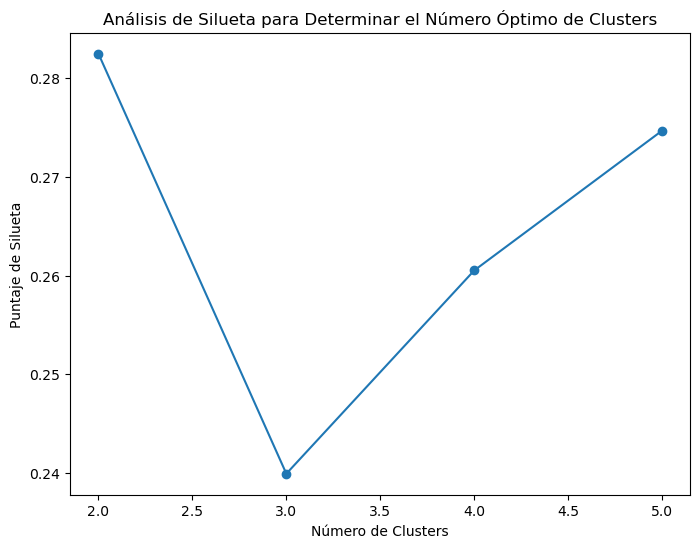

In [62]:
# Visualizar el puntaje de la Silueta para cada número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.title('Análisis de Silueta para Determinar el Número Óptimo de Clusters')
plt.show()

In [63]:
# Determinar el número óptimo de clusters
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters es: {optimal_n_clusters}')


El número óptimo de clusters es: 2


El análisis del coeficiente de Silueta ha indicado que el número óptimo de clusters es 8, lo cual puede ser justificado desde un punto de vista puramente matemático. Sin embargo, en la práctica, hemos decidido conveniente elegir un número más pequeño de clusters por razones de interpretabilidad y simplicidad, ya que el objetivo es obtener una comprensión más clara y manejable de los datos. Por ello, el clustering se va a realizar empleando 2 clusters (tercera mejor opción según análisis de Silueta).

In [64]:
# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)


C:\Users\llozada.GOURMET\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


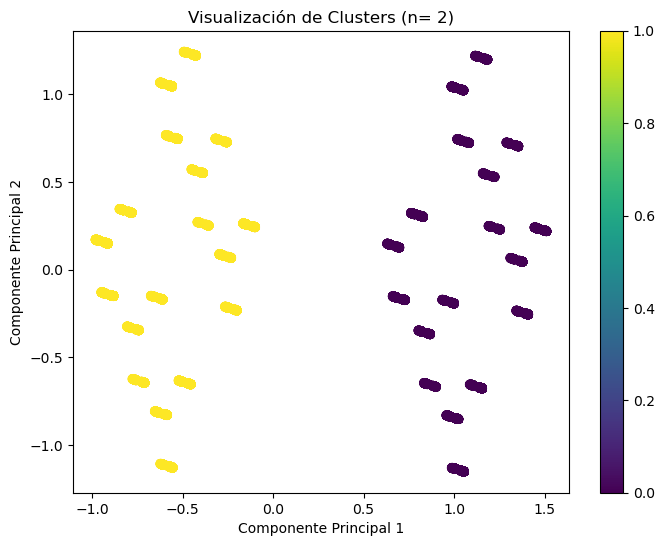

In [65]:
# Visualizar los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Visualización de Clusters (n= 2)')
plt.colorbar()
plt.show()

In [41]:
# Análisis de clusters
print("Media de la variable Status para cada cluster")
cluster_analysis = pd.DataFrame({'Cluster': cluster_labels, 'Status': y})
cluster_summary = cluster_analysis.groupby('Cluster')['Status'].mean()
print(cluster_summary)


Media de la variable Status para cada cluster
Cluster
0    0.197182
1    0.209288
Name: Status, dtype: float64


In [42]:
# Añadir etiquetas de clusters al DataFrame original
df['Cluster'] = cluster_analysis['Cluster']

In [43]:
# Obtener lista de columnas numéricas que no sean 'Cluster'
cluster_column = 'Cluster'
non_cluster_numeric_columns = [col for col in df.select_dtypes(include='number').columns if col != cluster_column]


<Figure size 600x400 with 0 Axes>

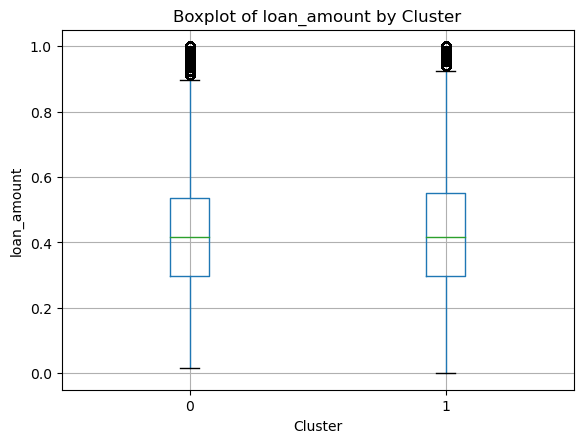

<Figure size 600x400 with 0 Axes>

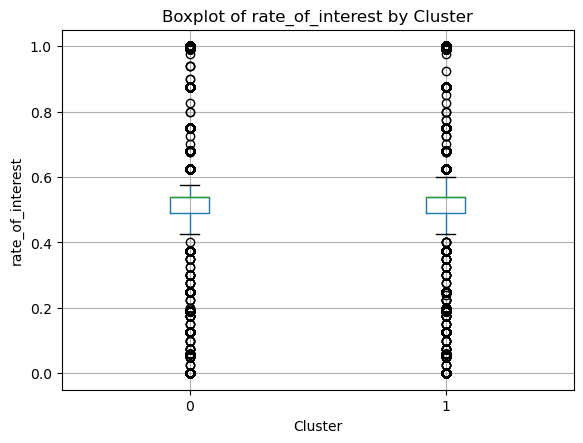

<Figure size 600x400 with 0 Axes>

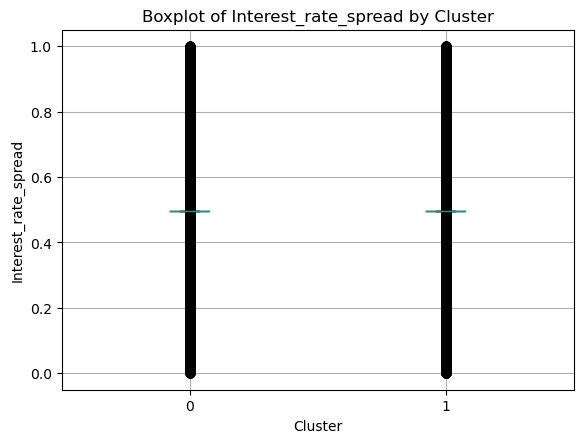

<Figure size 600x400 with 0 Axes>

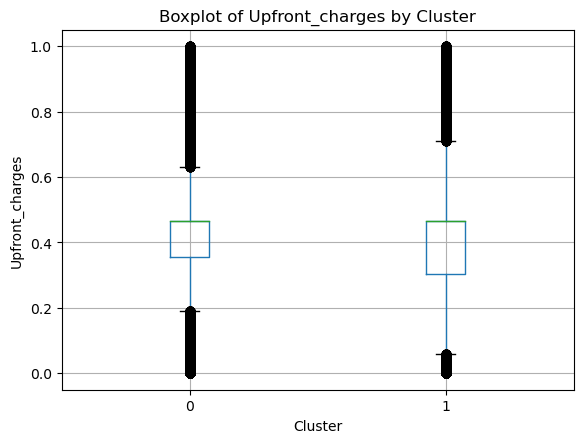

<Figure size 600x400 with 0 Axes>

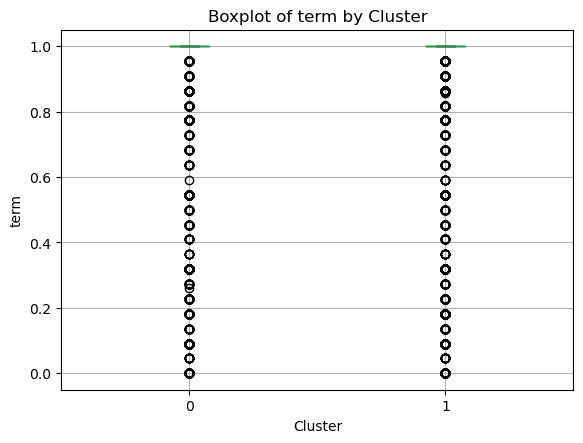

<Figure size 600x400 with 0 Axes>

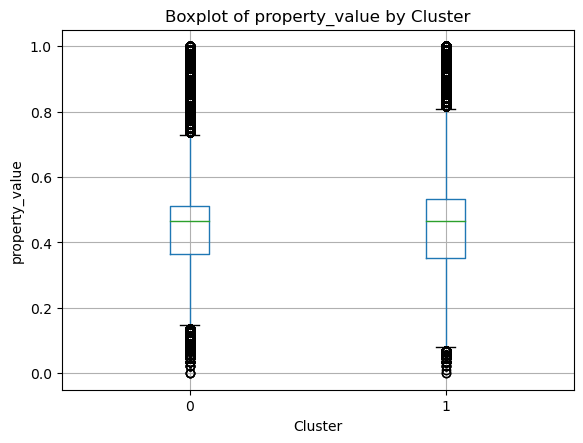

<Figure size 600x400 with 0 Axes>

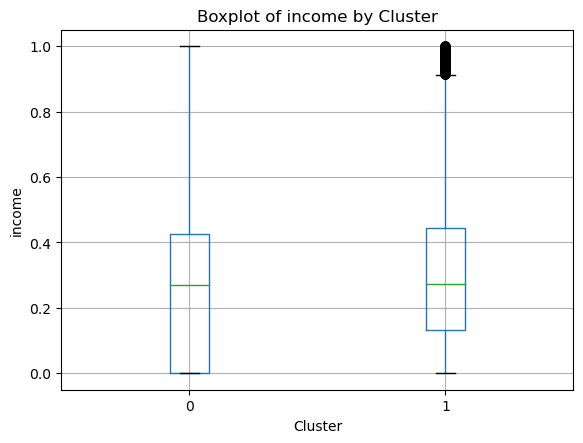

<Figure size 600x400 with 0 Axes>

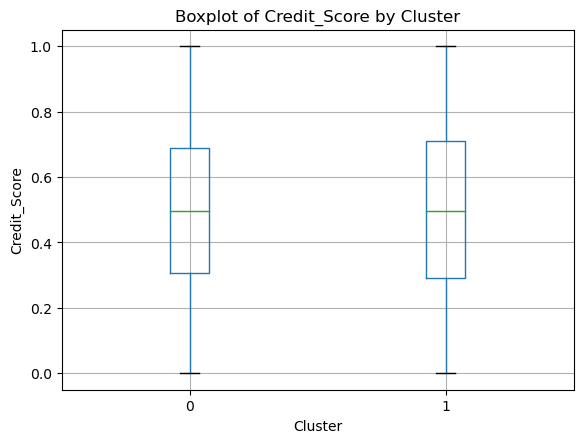

<Figure size 600x400 with 0 Axes>

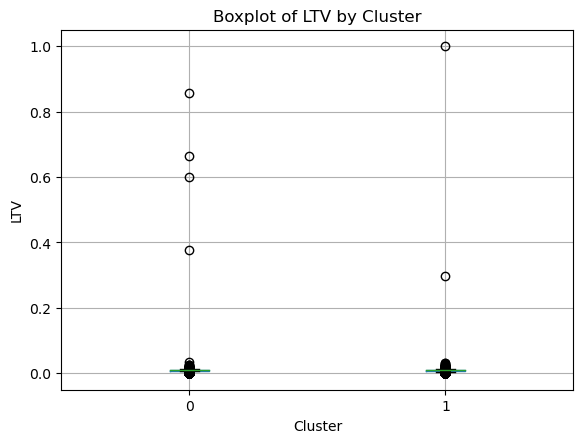

<Figure size 600x400 with 0 Axes>

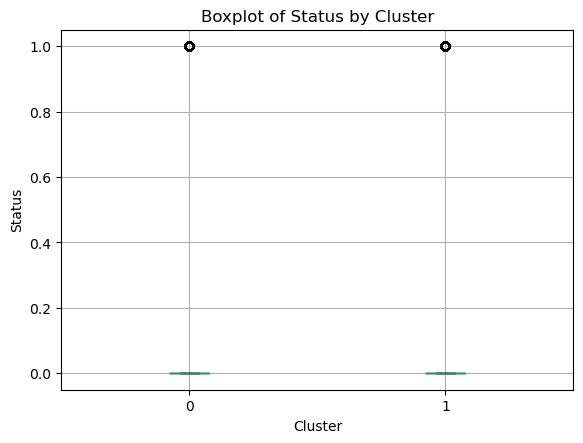

<Figure size 600x400 with 0 Axes>

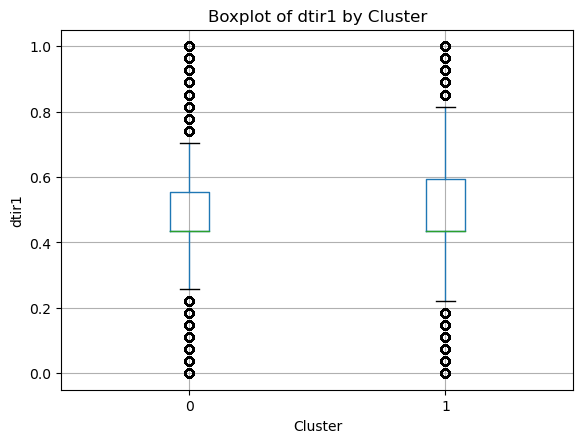

<Figure size 600x400 with 0 Axes>

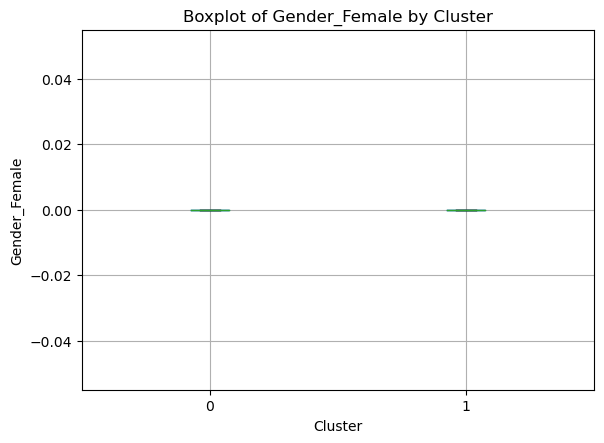

<Figure size 600x400 with 0 Axes>

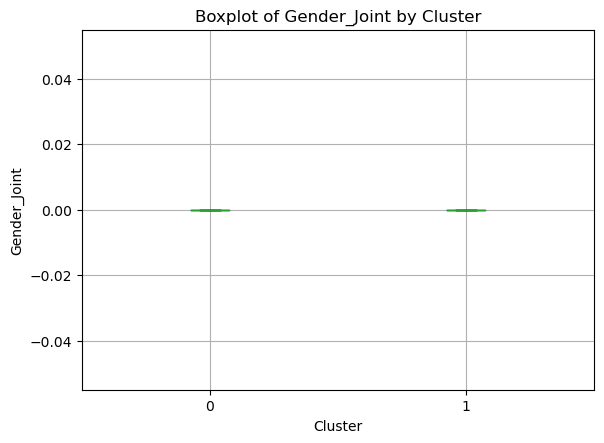

<Figure size 600x400 with 0 Axes>

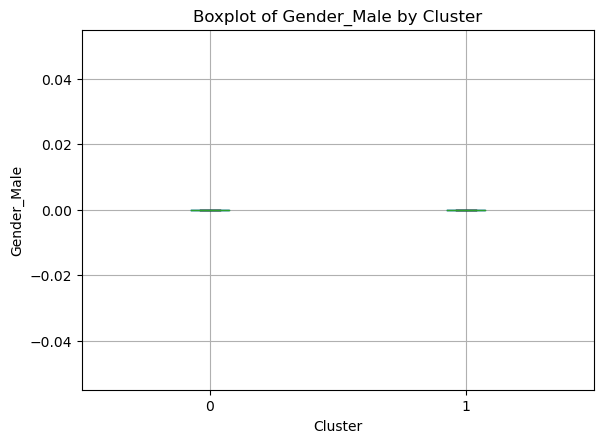

<Figure size 600x400 with 0 Axes>

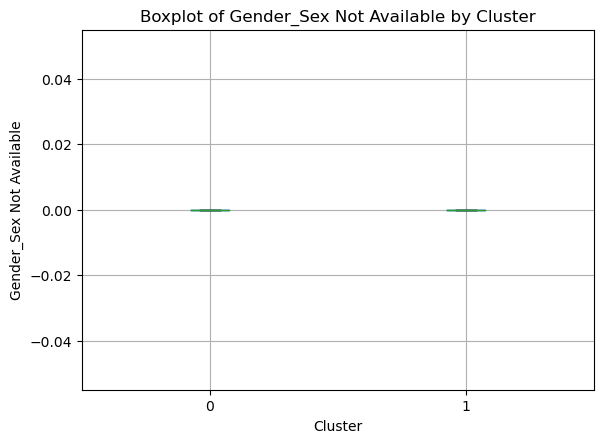

<Figure size 600x400 with 0 Axes>

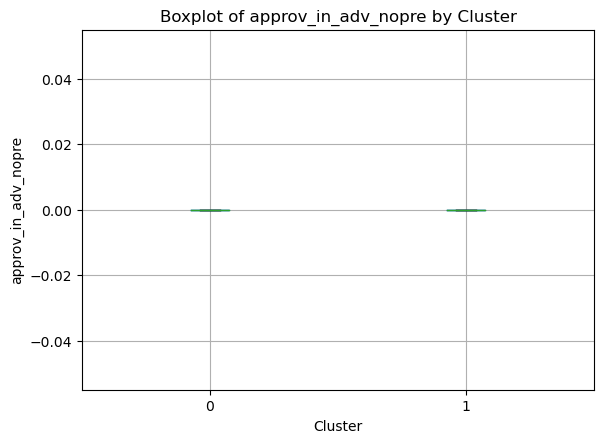

<Figure size 600x400 with 0 Axes>

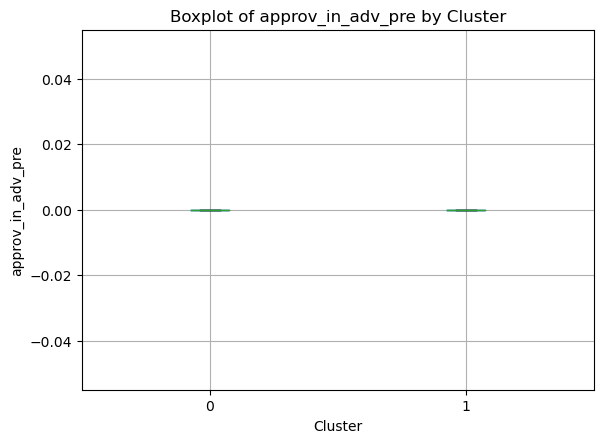

<Figure size 600x400 with 0 Axes>

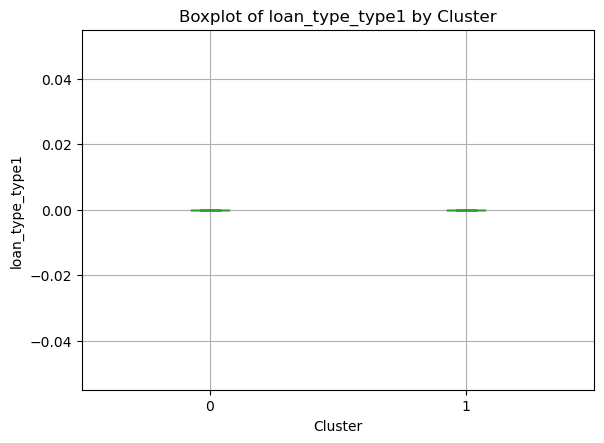

<Figure size 600x400 with 0 Axes>

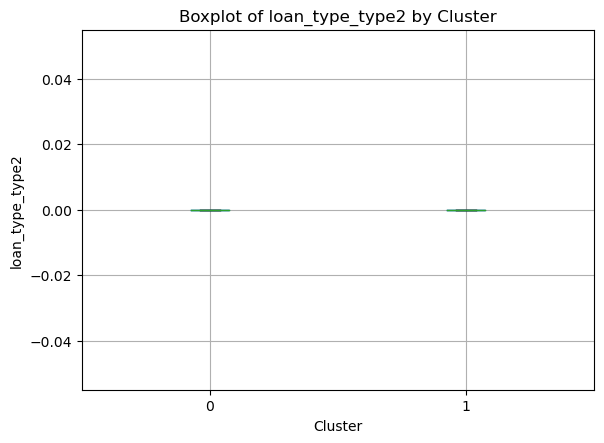

<Figure size 600x400 with 0 Axes>

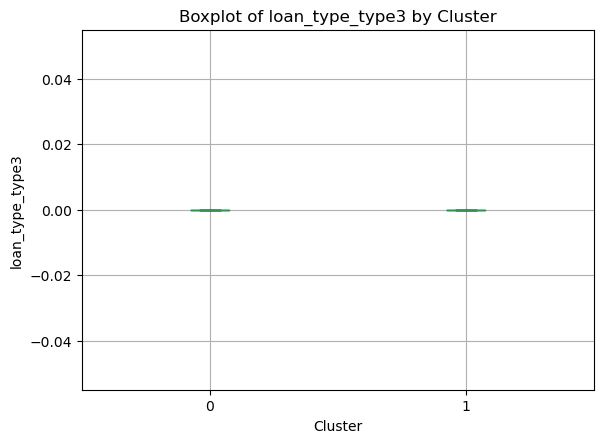

<Figure size 600x400 with 0 Axes>

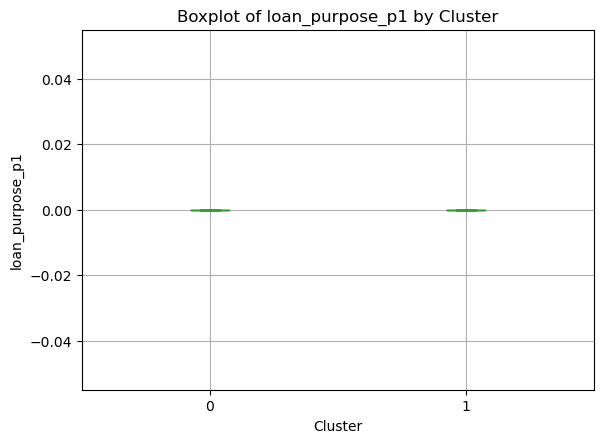

<Figure size 600x400 with 0 Axes>

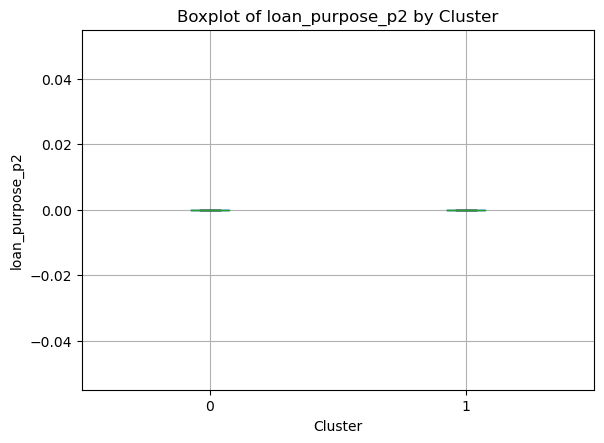

<Figure size 600x400 with 0 Axes>

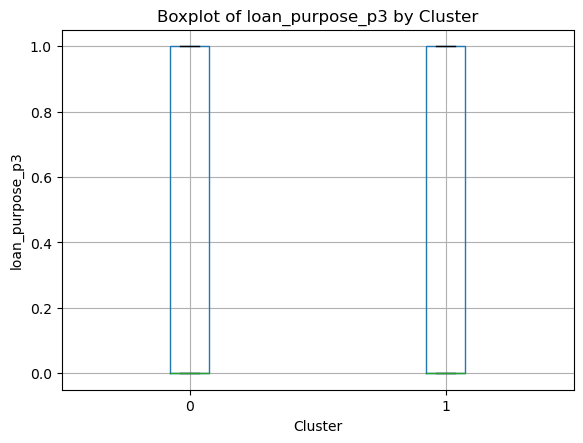

<Figure size 600x400 with 0 Axes>

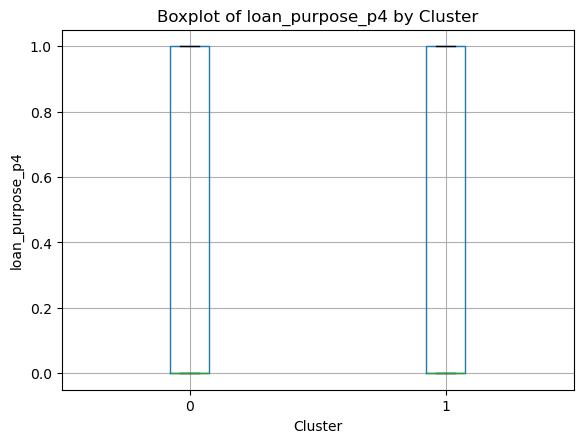

<Figure size 600x400 with 0 Axes>

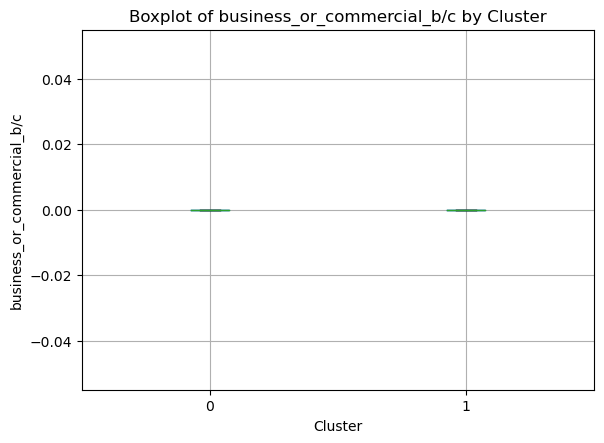

<Figure size 600x400 with 0 Axes>

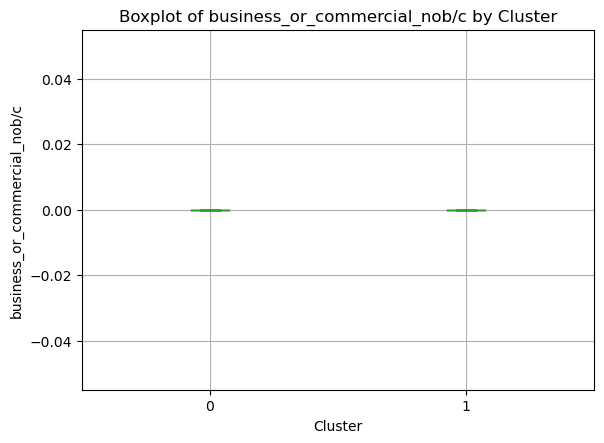

<Figure size 600x400 with 0 Axes>

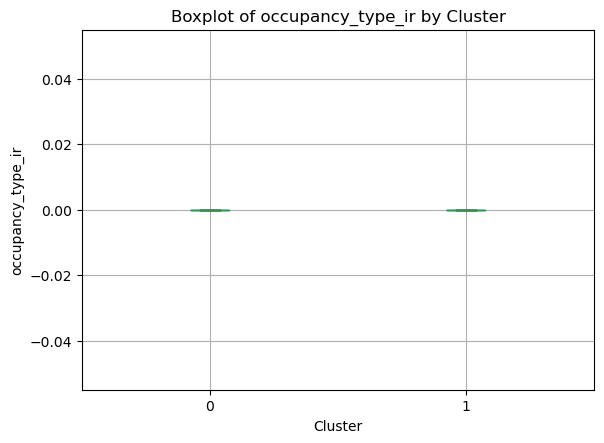

<Figure size 600x400 with 0 Axes>

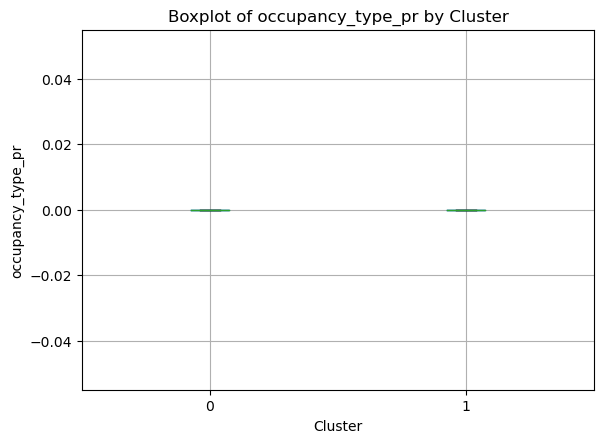

<Figure size 600x400 with 0 Axes>

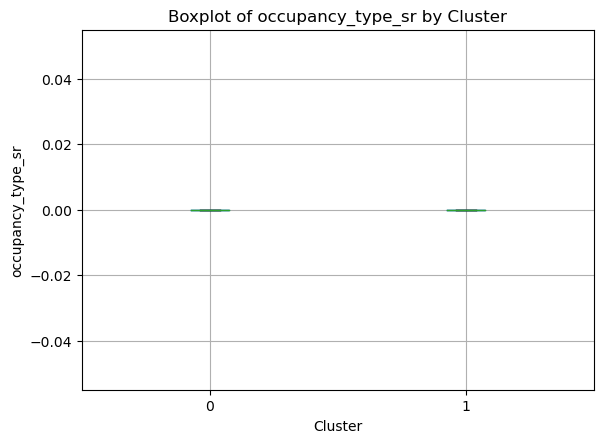

<Figure size 600x400 with 0 Axes>

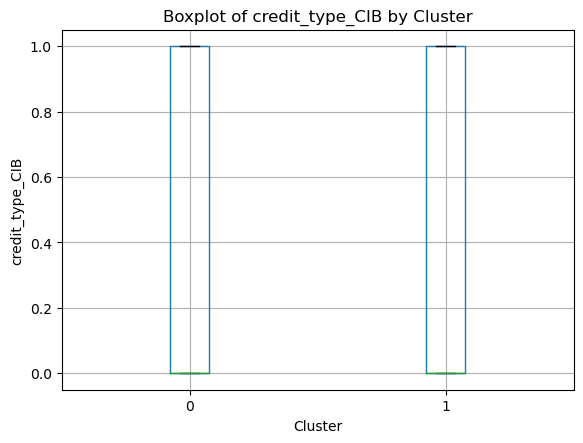

<Figure size 600x400 with 0 Axes>

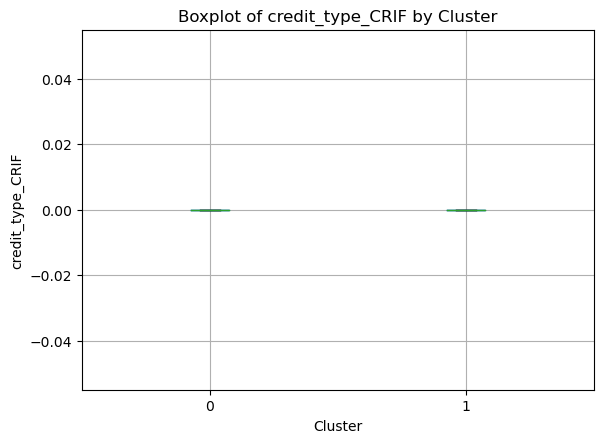

<Figure size 600x400 with 0 Axes>

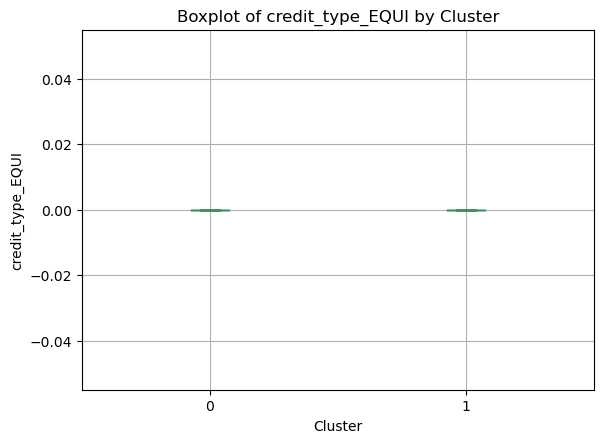

<Figure size 600x400 with 0 Axes>

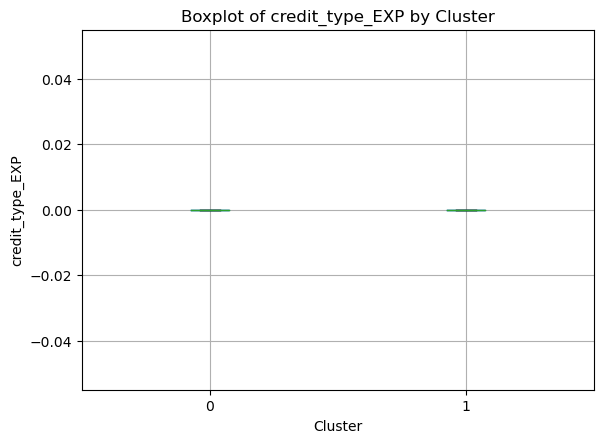

<Figure size 600x400 with 0 Axes>

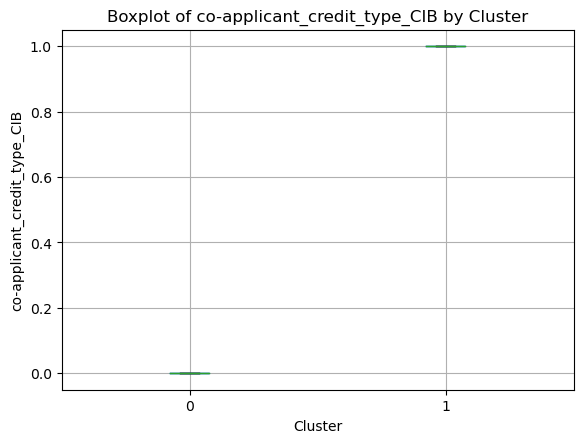

<Figure size 600x400 with 0 Axes>

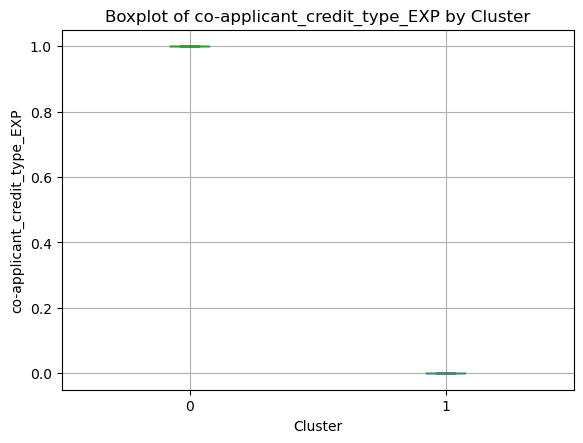

<Figure size 600x400 with 0 Axes>

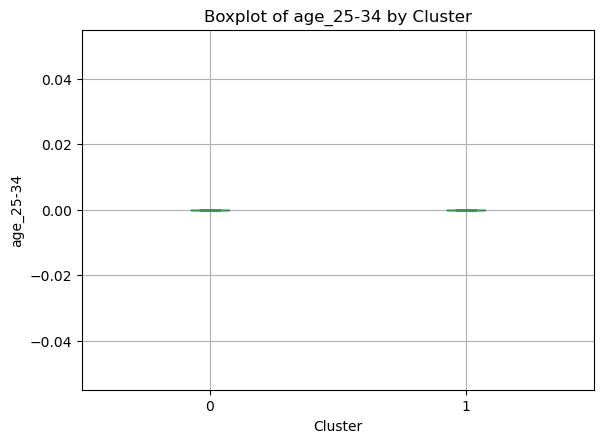

<Figure size 600x400 with 0 Axes>

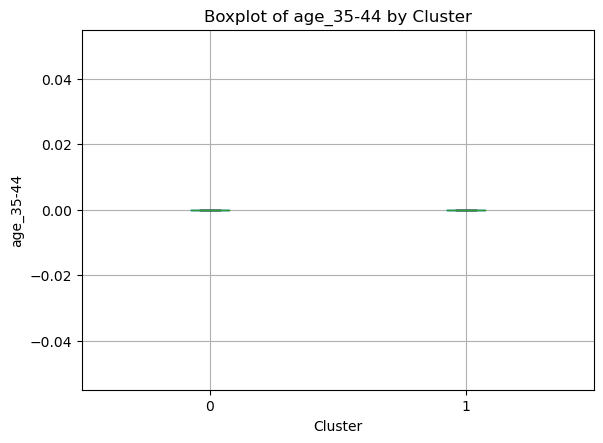

<Figure size 600x400 with 0 Axes>

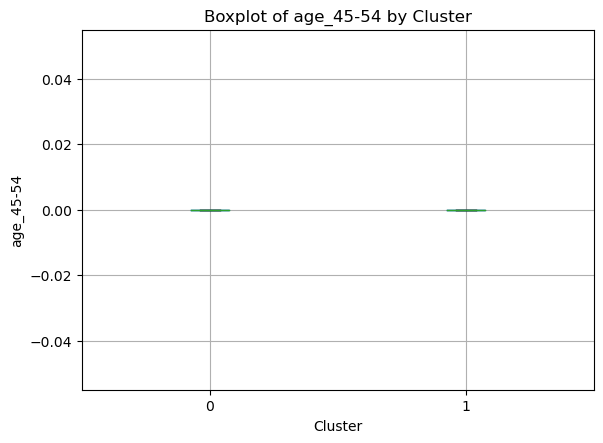

<Figure size 600x400 with 0 Axes>

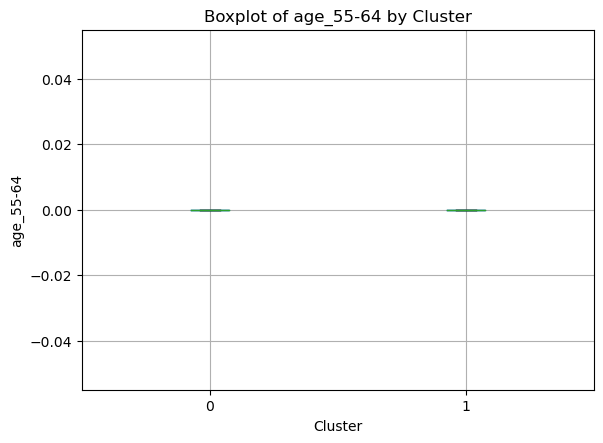

<Figure size 600x400 with 0 Axes>

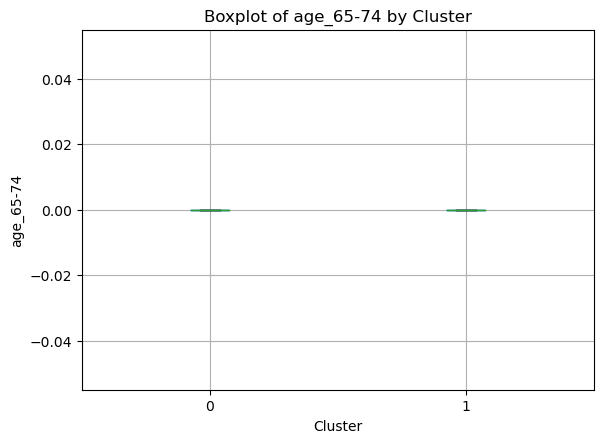

<Figure size 600x400 with 0 Axes>

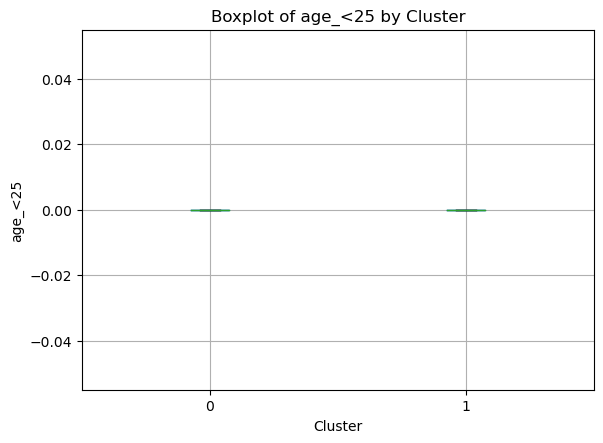

<Figure size 600x400 with 0 Axes>

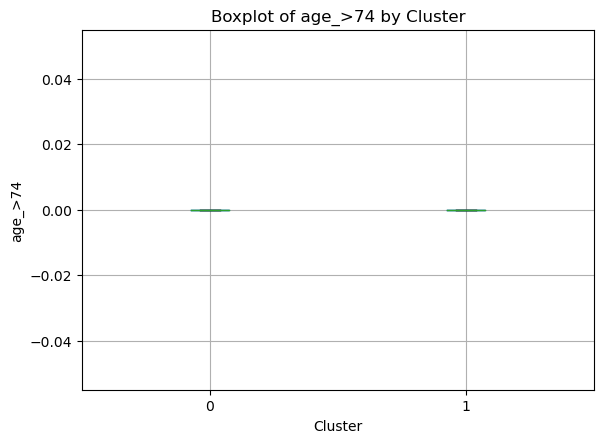

<Figure size 600x400 with 0 Axes>

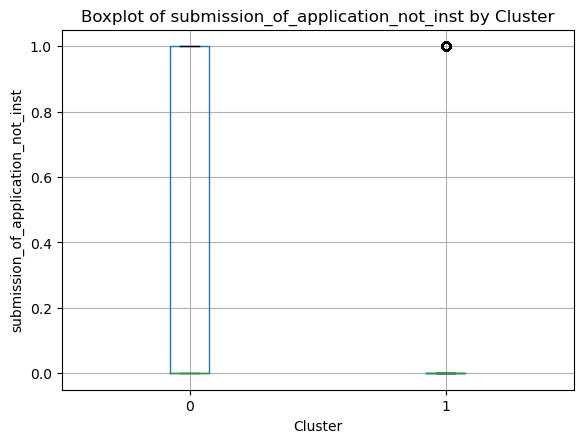

<Figure size 600x400 with 0 Axes>

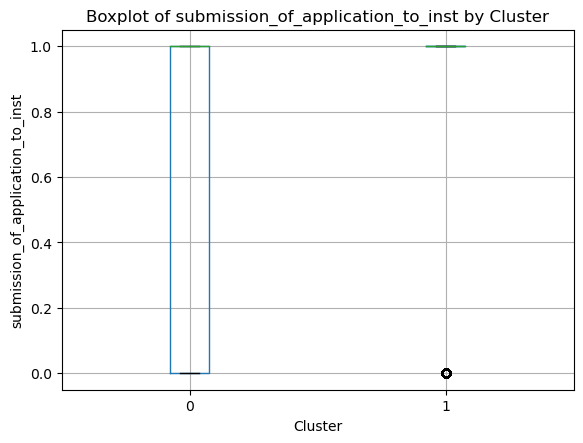

<Figure size 600x400 with 0 Axes>

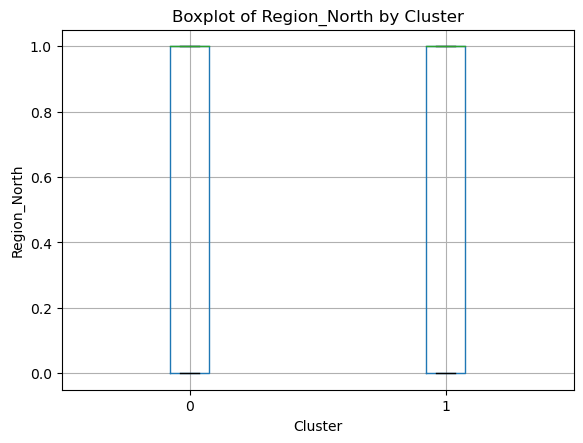

<Figure size 600x400 with 0 Axes>

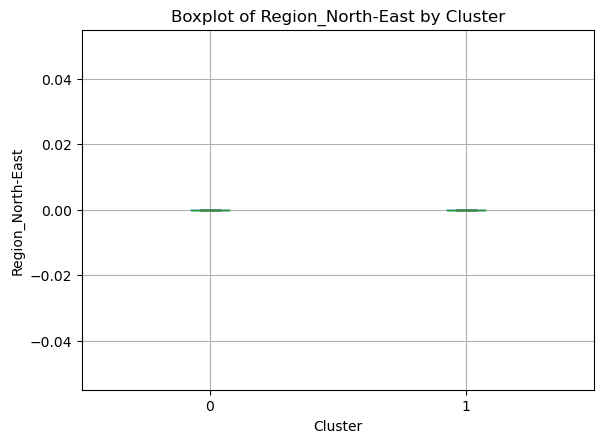

<Figure size 600x400 with 0 Axes>

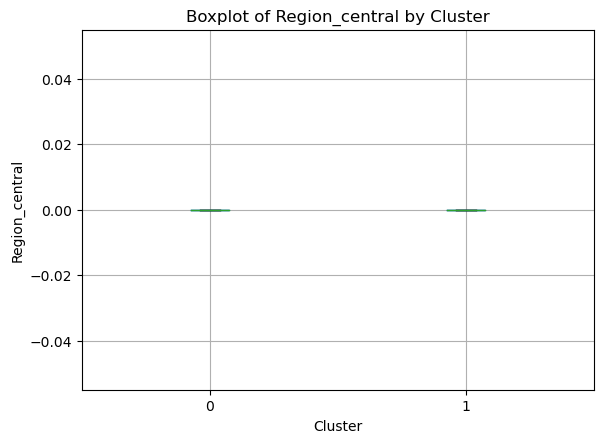

<Figure size 600x400 with 0 Axes>

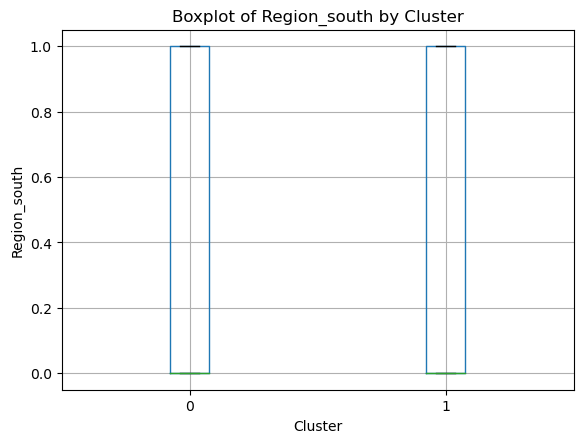

In [47]:
# Crear boxplots para cada variable numérica no de cluster agrupada por la variable 'Cluster'
for column in non_cluster_numeric_columns:
    try:
        plt.figure(figsize=(6, 4))
        df.boxplot(column=column, by=cluster_column)
        plt.title(f'Boxplot of {column} by {cluster_column}')
        plt.suptitle('')  # Eliminar el título por defecto que añade pandas
        plt.xlabel(cluster_column)
        plt.ylabel(column)
        plt.show()
    except Exception as e:
        print(f"Error plotting {column}: {e}")
        continue


## Modelo 1

In [44]:
scaler_dict = {}
# data normalization
for col_name in df.columns.difference(['Status']):
    if(df[col_name].dtype == 'int64') or (df[col_name].dtype == 'float64'):
        print(col_name + ' ' + str(df[col_name].dtype))
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler = scaler.fit(df[col_name].values.reshape(-1, 1))
        df[col_name] = scaler.transform(df[col_name].values.reshape(-1, 1))
        scaler_dict[col_name] = scaler
scaler_dict

Credit_Score float64
Gender_Female float64
Gender_Joint float64
Gender_Male float64
Gender_Sex Not Available float64
Interest_rate_spread float64
LTV float64
Region_North float64
Region_North-East float64
Region_central float64
Region_south float64
Upfront_charges float64
age_25-34 float64
age_35-44 float64
age_45-54 float64
age_55-64 float64
age_65-74 float64
age_<25 float64
age_>74 float64
approv_in_adv_nopre float64
approv_in_adv_pre float64
business_or_commercial_b/c float64
business_or_commercial_nob/c float64
co-applicant_credit_type_CIB float64
co-applicant_credit_type_EXP float64
credit_type_CIB float64
credit_type_CRIF float64
credit_type_EQUI float64
credit_type_EXP float64
dtir1 float64
income float64
loan_amount float64
loan_purpose_p1 float64
loan_purpose_p2 float64
loan_purpose_p3 float64
loan_purpose_p4 float64
loan_type_type1 float64
loan_type_type2 float64
loan_type_type3 float64
occupancy_type_ir float64
occupancy_type_pr float64
occupancy_type_sr float64
property_val

{'Credit_Score': MinMaxScaler(),
 'Gender_Female': MinMaxScaler(),
 'Gender_Joint': MinMaxScaler(),
 'Gender_Male': MinMaxScaler(),
 'Gender_Sex Not Available': MinMaxScaler(),
 'Interest_rate_spread': MinMaxScaler(),
 'LTV': MinMaxScaler(),
 'Region_North': MinMaxScaler(),
 'Region_North-East': MinMaxScaler(),
 'Region_central': MinMaxScaler(),
 'Region_south': MinMaxScaler(),
 'Upfront_charges': MinMaxScaler(),
 'age_25-34': MinMaxScaler(),
 'age_35-44': MinMaxScaler(),
 'age_45-54': MinMaxScaler(),
 'age_55-64': MinMaxScaler(),
 'age_65-74': MinMaxScaler(),
 'age_<25': MinMaxScaler(),
 'age_>74': MinMaxScaler(),
 'approv_in_adv_nopre': MinMaxScaler(),
 'approv_in_adv_pre': MinMaxScaler(),
 'business_or_commercial_b/c': MinMaxScaler(),
 'business_or_commercial_nob/c': MinMaxScaler(),
 'co-applicant_credit_type_CIB': MinMaxScaler(),
 'co-applicant_credit_type_EXP': MinMaxScaler(),
 'credit_type_CIB': MinMaxScaler(),
 'credit_type_CRIF': MinMaxScaler(),
 'credit_type_EQUI': MinMaxScale

In [45]:
df.head(5)

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Cluster
24890,0.149254,0.539763,0.497562,0.466559,1.0,0.125000,0.107407,0.6450,0.012485,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
24891,0.283582,0.539763,0.497562,0.466559,1.0,0.465909,0.307407,0.1300,0.009469,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
24892,0.582090,0.539763,0.315230,0.106654,1.0,0.568182,0.585185,0.8350,0.010096,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
24893,0.656716,0.750000,0.784224,0.466559,1.0,0.738636,0.733333,0.2175,0.008737,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
24894,0.417910,0.500000,0.416829,0.000000,1.0,0.852273,0.644444,0.2550,0.011611,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your DataFrame and 'Status' is the target variable
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9801871216290589

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     27403
         1.0       0.92      0.99      0.95      7120

    accuracy                           0.98     34523
   macro avg       0.96      0.98      0.97     34523
weighted avg       0.98      0.98      0.98     34523



In [50]:
# List all column names in the dataframe
# List all column names in the dataframe
df.rename(columns={'age_<25': 'age_more_25'}, inplace=True) #Renaming to comply with xgboost
df.rename(columns={'age_>75': 'age_less_75'}, inplace=True)
print("Column names in the dataframe:")
print(df.columns.tolist())
# Renaming the column 'age_<25' to 'age_less_25'



Column names in the dataframe:
['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1', 'Gender_Female', 'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre', 'loan_type_type1', 'loan_type_type2', 'loan_type_type3', 'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4', 'business_or_commercial_b/c', 'business_or_commercial_nob/c', 'occupancy_type_ir', 'occupancy_type_pr', 'occupancy_type_sr', 'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP', 'co-applicant_credit_type_CIB', 'co-applicant_credit_type_EXP', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'age_more_25', 'age_>74', 'submission_of_application_not_inst', 'submission_of_application_to_inst', 'Region_North', 'Region_North-East', 'Region_central', 'Region_south', 'Cluster']


In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame and 'Status' is the target variable
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = xgb_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.980505749789995

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     27403
         1.0       0.92      0.99      0.95      7120

    accuracy                           0.98     34523
   macro avg       0.96      0.98      0.97     34523
weighted avg       0.98      0.98      0.98     34523



# Alternative models

In [55]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'XGBoost': xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    #'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multi-layer Perceptron': MLPClassifier(random_state=42)
}

# Function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return acc, report

# Splitting the data into train and test sets
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
results = {}
for name, model in models.items():
    acc, report = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'Accuracy': acc, 'Classification Report': report}

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Classification Report']}\n")


Model: Random Forest
Accuracy: 0.9801871216290589
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     27403
         1.0       0.92      0.99      0.95      7120

    accuracy                           0.98     34523
   macro avg       0.96      0.98      0.97     34523
weighted avg       0.98      0.98      0.98     34523


Model: AdaBoost
Accuracy: 0.9771456710019407
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     27403
         1.0       0.92      0.97      0.95      7120

    accuracy                           0.98     34523
   macro avg       0.96      0.98      0.97     34523
weighted avg       0.98      0.98      0.98     34523


Model: Extra Trees
Accuracy: 0.9683978796744199
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     27403
         1.0       0.91

# Explicatoriedad de las variables

In [66]:
import shap

# Find the best performing model
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = models[best_model_name]

# Compute SHAP values for the best model
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

NameError: name 'results' is not defined

In [46]:
df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Cluster
24890,0.149254,0.539763,0.497562,0.466559,1.0,0.125000,0.107407,0.6450,0.012485,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
24891,0.283582,0.539763,0.497562,0.466559,1.0,0.465909,0.307407,0.1300,0.009469,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
24892,0.582090,0.539763,0.315230,0.106654,1.0,0.568182,0.585185,0.8350,0.010096,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
24893,0.656716,0.750000,0.784224,0.466559,1.0,0.738636,0.733333,0.2175,0.008737,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
24894,0.417910,0.500000,0.416829,0.000000,1.0,0.852273,0.644444,0.2550,0.011611,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143800,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
143804,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
143809,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
143891,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming 'df' is your DataFrame and 'Status' is the target variable
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Target variable

# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Using cross-validation to evaluate the model
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

# Printing the accuracy for each fold
print("Accuracy scores for each fold:", cv_scores)

# Printing the mean accuracy across all folds
print("Mean cross-validation accuracy:", cv_scores.mean())

Accuracy scores for each fold: [0.97645048 0.97549389 0.97537802 0.9715254  0.93960373]
Mean cross-validation accuracy: 0.9676903050200899


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Set up the parameter grid to combat overfitting
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],  # Lower depth to prevent complex models
    'learning_rate': [0.01, 0.1],  # Lower learning rate for more robust learning
    'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 1],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1],  # L1 regularization term on weights
    'reg_lambda': [1, 2]  # L2 regularization term on weights to be more conservative
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters to prevent overfitting with XGBoost:", grid_search.best_params_)
print("Best score with these parameters:", grid_search.best_score_)

In [53]:
import joblib

# Asumiendo que 'rf_model' es tu modelo final entrenado
joblib.dump(rf_model, 'final_random_forest_model.pkl')

print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [54]:
df.describe()
df_backup = df

In [55]:
df_backup.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_65-74,age_more_25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Cluster
count,172611.000000,172611.000000,172611.000000,172611.000000,172611.000000,172611.000000,172611.000000,172611.000000,172611.000000,172611.000000,...,172611.0,172611.0,172611.0,172611.000000,172611.000000,172611.000000,172611.0,172611.0,172611.000000,172611.000000
mean,0.437129,0.509912,0.483268,0.413644,0.921303,0.466537,0.292893,0.498954,0.009238,0.204245,...,0.0,0.0,0.0,0.295856,0.704144,0.585588,0.0,0.0,0.358737,0.583439
std,0.201544,0.198576,0.175887,0.225499,0.205209,0.183534,0.233829,0.264578,0.004476,0.403150,...,0.0,0.0,0.0,0.456428,0.456428,0.492622,0.0,0.0,0.479631,0.492990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.298507,0.490000,0.497562,0.324891,1.000000,0.352273,0.111111,0.297500,0.008470,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,0.417910,0.539763,0.497562,0.466559,1.000000,0.465909,0.274074,0.497500,0.009469,0.000000,...,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
75%,0.552239,0.539763,0.497562,0.466559,1.000000,0.522727,0.437037,0.700000,0.010253,0.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


In [56]:
# Display the 'Status' column from the DataFrame
# Display distinct values in the 'Status' column from the DataFrame
distinct_status_values = df['Status'].unique()
print("Distinct values in the 'Status' column:", distinct_status_values)


Distinct values in the 'Status' column: [1. 0.]


In [57]:
df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_65-74,age_more_25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Cluster
24890,0.149254,0.539763,0.497562,0.466559,1.0,0.125000,0.107407,0.6450,0.012485,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
24891,0.283582,0.539763,0.497562,0.466559,1.0,0.465909,0.307407,0.1300,0.009469,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
24892,0.582090,0.539763,0.315230,0.106654,1.0,0.568182,0.585185,0.8350,0.010096,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
24893,0.656716,0.750000,0.784224,0.466559,1.0,0.738636,0.733333,0.2175,0.008737,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
24894,0.417910,0.500000,0.416829,0.000000,1.0,0.852273,0.644444,0.2550,0.011611,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143800,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
143804,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
143809,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
143891,0.417910,0.539763,0.497562,0.466559,1.0,0.465909,0.000000,0.4975,0.009469,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1




Epoch 1/100

3776/3776 [==============================] - 10s 2ms/step - loss: 0.4351 - val_loss: 0.2986
Epoch 2/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.3370 - val_loss: 0.2472
Epoch 3/100
3776/3776 [==============================] - 7s 2ms/step - loss: 0.2996 - val_loss: 0.1964
Epoch 4/100
3776/3776 [==============================] - 10s 3ms/step - loss: 0.2702 - val_loss: 0.2294
Epoch 5/100
3776/3776 [==============================] - 9s 2ms/step - loss: 0.2616 - val_loss: 0.1817
Epoch 6/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.2400 - val_loss: 0.1860
Epoch 7/100
3776/3776 [==============================] - 9s 2ms/step - loss: 0.2375 - val_loss: 0.1943
Epoch 8/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.2327 - val_loss: 0.2262
Epoch 9/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.2248 - val_loss: 0.1892
Epoch 10/100
3776/3776 [==============================] - 8s 2ms/ste

3776/3776 [==============================] - 8s 2ms/step - loss: 0.1565 - val_loss: 0.1243
Epoch 74/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.1555 - val_loss: 0.1265
Epoch 75/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.1536 - val_loss: 0.1527
Epoch 76/100
3776/3776 [==============================] - 9s 2ms/step - loss: 0.1564 - val_loss: 0.1155
Epoch 77/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.1538 - val_loss: 0.1203
Epoch 78/100
3776/3776 [==============================] - 8s 2ms/step - loss: 0.1536 - val_loss: 0.1256
Epoch 79/100
3776/3776 [==============================] - 9s 2ms/step - loss: 0.1564 - val_loss: 0.1339
Epoch 80/100
3776/3776 [==============================] - 10s 3ms/step - loss: 0.1567 - val_loss: 0.1330
Epoch 81/100
3776/3776 [==============================] - 9s 2ms/step - loss: 0.1557 - val_loss: 0.1377
Epoch 82/100
3776/3776 [==============================] - 8s 2ms/step - loss

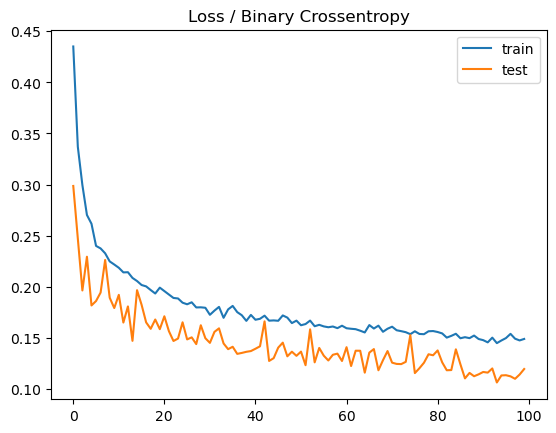

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# Assuming 'df' is your DataFrame and 'Status' is the target variable
X = df.drop('Status', axis=1).values  # Features
y = df['Status'].values  # Target variable

# Splitting the data into train and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=999)

# Creating the neural network model with added Dropout layers to prevent overfitting
model = Sequential([
    Dense(32, activation='relu', input_shape=(trainX.shape[1],)),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Define optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(loss='binary_crossentropy', optimizer=opt)  # Use binary_crossentropy for binary classification

# Fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

# Evaluate the model
train_loss = model.evaluate(trainX, trainy, verbose=0)
test_loss = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))

# Plot loss during training
pyplot.title('Loss / Binary Crossentropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.980505749789995
Precision: 0.9236430542778289
Recall: 0.9870786516853932
F1 Score: 0.9543078280942359


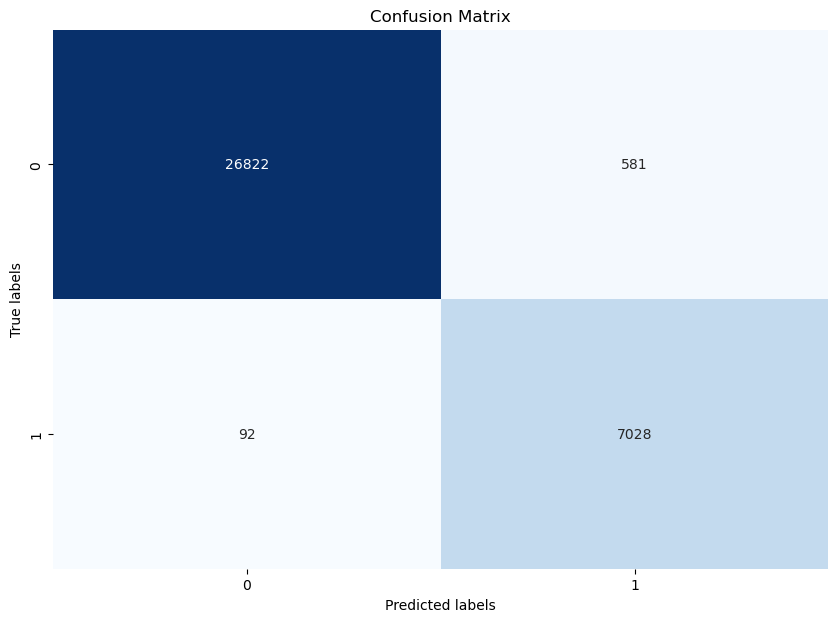

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()